In [4]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import copy
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1440/984022839.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
df = pd.read_csv('data.csv', low_memory=False)
#df = df.sample(len(df)//32,random_state=0)
#df = df.reset_index(drop=True)

In [9]:
df.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [10]:
df["AverageSalary"] = df.loc[:, ["LowestSalary","HighestSalary"]].mean(axis = 1)
AverageSalary = df.groupby('AverageSalary')
averageSalaryStats = AverageSalary.count()
averageSalaryStats['Count'] = averageSalaryStats['Id']
averageSalaryStats['Count']

AverageSalary
15.0     62639
35.0     23476
45.0     34436
55.0     27027
65.0     28499
75.0     28712
90.0     24249
110.0    27673
135.0    24514
175.0    25841
599.5    11411
Name: Count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 9952 non-null   int64         
 1   Title              9952 non-null   object        
 2   Company            9952 non-null   object        
 3   Date               9952 non-null   datetime64[ns]
 4   Location           9952 non-null   object        
 5   Area               9952 non-null   object        
 6   Classification     9952 non-null   object        
 7   SubClassification  9952 non-null   object        
 8   Requirement        9952 non-null   object        
 9   FullDescription    9952 non-null   object        
 10  LowestSalary       9952 non-null   int64         
 11  HighestSalary      9952 non-null   int64         
 12  JobType            9952 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1010.9+

In [29]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,"[Our, client, based, Yarravillenbspand, lookin...",50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,"[DiUS, Australian, technology, consultancy, We...",120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"[About, thenbspOrganisation, Life, Without, Ba...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"[Correct, Care, Australasia, Correct, Care, en...",0,30,Part Time
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,"[The, Company, Elastomers, Australia, industry...",50,60,Full Time
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,Other,Other,Other,Other,** Entry Level Real Estate Reception roles SYD...,"[Do, want, break, real, estatenbsp, Do, certif...",40,50,Full Time
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,Other,Other,Other,Other,Critical expert role to keep Queensland's HV t...,"[Powerlink, predecessor, company, helping, kee...",150,200,Contract/Temp
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,Other,Other,Other,Other,Immediate start / Morning shift available / Ex...,"[About, company, Toll, People, conjunction, cl...",30,40,Full Time
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,"[About, Role, Total, Tools, Springwood, isnbsp...",40,50,Full Time
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,Other,"Mining, Resources & Energy",Management,Exciting opportunity to work with a reputable ...,"[Our, client, large, established, organisation...",200,999,Full Time


In [71]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,"[Our, client, based, Yarravillenbspand, lookin...",50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,"[DiUS, Australian, technology, consultancy, We...",120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"[About, thenbspOrganisation, Life, Without, Ba...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"[Correct, Care, Australasia, Correct, Care, en...",0,30,Part Time
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,"[The, Company, Elastomers, Australia, industry...",50,60,Full Time
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,Other,Other,Other,Other,** Entry Level Real Estate Reception roles SYD...,"[Do, want, break, real, estatenbsp, Do, certif...",40,50,Full Time
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,Other,Other,Other,Other,Critical expert role to keep Queensland's HV t...,"[Powerlink, predecessor, company, helping, kee...",150,200,Contract/Temp
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,Other,Other,Other,Other,Immediate start / Morning shift available / Ex...,"[About, company, Toll, People, conjunction, cl...",30,40,Full Time
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,"[About, Role, Total, Tools, Springwood, isnbsp...",40,50,Full Time
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,Other,"Mining, Resources & Energy",Management,Exciting opportunity to work with a reputable ...,"[Our, client, large, established, organisation...",200,999,Full Time


In [31]:
df['Id'] = df['Id'].astype('int64')

In [32]:
tf = df['Id']
for e,x in enumerate(tf):
    if len(x) > 8:
        tf[e] = x[:8]
df['Id'] = df['Id'].astype('int64')

TypeError: object of type 'int' has no len()

In [ ]:
df.info()

In [ ]:
df[df['LowestSalary'] > df['HighestSalary']].shape[0]

In [ ]:
df[df.duplicated()]

In [ ]:
df.drop_duplicates()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.fillna("Other", inplace = True)
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df['FullDescription'][195]

In [ ]:
def removeformatting(text):
    formats = []
    new = [0,0]
    result = text
    for e,x in enumerate(text):
        if x == '<':
            new[0] = e
        elif x == '>':
            new[1] = e
            formats.append(tuple(new))
        elif x == "\n":
            formats.append((e,e+1))
    
    for x in formats[::-1]:
        result = result[:x[0]]+result[x[1]+1:]
    return result

removeformatting(df['FullDescription'][195])

In [ ]:
tf = df['FullDescription']
for e,x in enumerate(tf):
    tf[e] = removeformatting(x)
df['FullDescription'][195]

In [ ]:
tf = df['FullDescription']
tokens = []
for e,s in enumerate(tf):
    token = nltk.word_tokenize(s)
    s = s.translate(str.maketrans('', '', string.punctuation))
    token = nltk.word_tokenize(s)
    token = [x for x in token if x not in nltk.corpus.stopwords.words('english')]
    lemma = nltk.stem.WordNetLemmatizer()
    token = [lemma.lemmatize(x) for x in token]
    tokens.append(token)
df['FullDescription'] = tokens
df['FullDescription'][195]

In [ ]:
df.to_csv('preprocessed.csv',index=False)

In [ ]:
print(len(df["Title"].unique()))
print(len(df["Company"].unique()))
print(df["Location"].unique())
print(df["Area"].unique())
print(df["Classification"].unique())
print(df["SubClassification"].unique())
print(df["JobType"].unique())

### Part II

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df2 = pd.read_csv("preprocessed.csv")

In [36]:
#df['AverageSalary'] = 
df2.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,"['Our', 'client', 'based', 'Yarravillenbspand'...",50,60,Contract/Temp
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,"['DiUS', 'Australian', 'technology', 'consulta...",120,150,Full Time
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"['About', 'thenbspOrganisation', 'Life', 'With...",100,120,Full Time
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"['Correct', 'Care', 'Australasia', 'Correct', ...",0,30,Part Time
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,"['The', 'Company', 'Elastomers', 'Australia', ...",50,60,Full Time


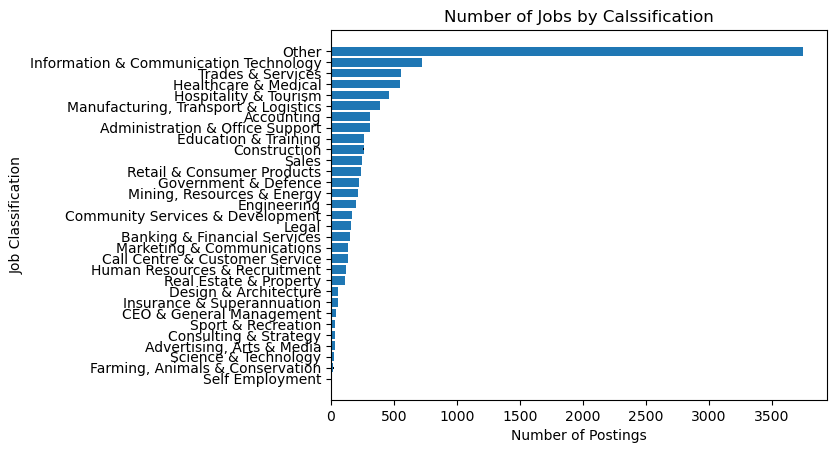

In [37]:
%matplotlib inline


# # ------------------------
# sns.set_theme(style="darkgrid")
# #titanic = sns.load_dataset("titanic")
# plt.figure(figsize = (20,15))
# ax = sns.countplot(x="Company", data=df2)
# #plt.xticks(rotation=45)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
# # ------------------------
jobNums = df2['Classification'].value_counts()

## Adapted
## https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
##

# Fixing random state for reproducibility
#np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(jobNums.index))
industry = jobNums.values
error = np.random.rand(len(jobNums.index))

ax.barh(y_pos, industry, xerr=error, align='center')
ax.set_yticks(y_pos, labels=jobNums.index)#people
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Postings')
ax.set_ylabel('Job Classification')
ax.set_title('Number of Jobs by Calssification')

plt.show()


In [38]:
bySalary = df2.groupby('LowestSalary')
salaryStats = bySalary.count()
salaryStats['Count'] = salaryStats['Id']
salaryStats['Count']

LowestSalary
0      1954
30      720
40     1112
50      831
60      910
70      898
80      775
100     870
120     743
150     769
200     370
Name: Count, dtype: int64

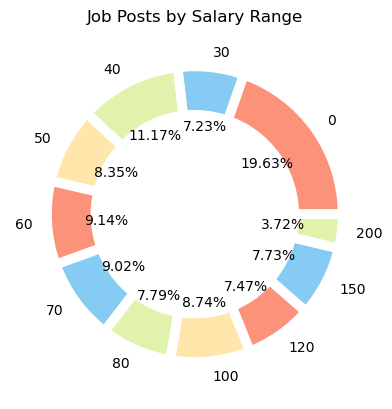

In [39]:
#salary ranges plot



# create data
names = salaryStats.index
size = salaryStats['Count']

 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names,autopct='%1.2f%%', colors=['#fc927a','#85cbf3','#e0f2ac','#ffe6ab'],wedgeprops = {'linewidth':7,'edgecolor':'white'})
p = plt.gcf()
p.gca().add_artist(my_circle)
p.gca().set_title('Job Posts by Salary Range')
# Show the graph
plt.show()

# Jobs Posted by salary Range

In [40]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,182,182,182,182,182,182,182,182,182,182,182,182,ACT,182
Adelaide,204,204,204,204,204,204,204,204,204,204,204,204,Adelaide,204
Adelaide Hills & Barossa,7,7,7,7,7,7,7,7,7,7,7,7,Adelaide Hills & Barossa,7
Albany & Great Southern,5,5,5,5,5,5,5,5,5,5,5,5,Albany & Great Southern,5
Albury Area,10,10,10,10,10,10,10,10,10,10,10,10,Albury Area,10


In [41]:
df2['Location']

0         Melbourne
1             Other
2             Other
3         Melbourne
4         Melbourne
           ...     
9947          Other
9948          Perth
9949         Sydney
9950          Other
9951    Western QLD
Name: Location, Length: 9952, dtype: object

In [42]:
by_comp = df2.groupby('Company')
by_comp.describe()

Id                                         \
                        count        mean            std         min   
Company                                                                
11 Recruitment            2.0  37577074.0  103735.393227  37503722.0   
1300 CHEFHIRE             1.0  37638522.0            NaN  37638522.0   
1300apprentice            1.0  37960436.0            NaN  37960436.0   
1918 Bistro and Grill     1.0  38086956.0            NaN  38086956.0   
1st Choice People         1.0  37986285.0            NaN  37986285.0   
...                       ...         ...            ...         ...   
white mojo                1.0  37502930.0            NaN  37502930.0   
whitecollarblue pty ltd   1.0  38335589.0            NaN  38335589.0   
wpccc                     1.0  38005107.0            NaN  38005107.0   
xtend recruitment         1.0  37908980.0            NaN  37908980.0   
yourtown                  1.0  37682417.0            NaN  37682417.0   

                                                                         \
                                25%         50%         75%         max   
Company                                                                   
11 Recruitment           37540398.0  37577074.0  37613750.0  37650426.0   
1300 CHEFHIRE            37638522.0  37638522.0  37638522.0  37638522.0   
1300apprentice           37960436.0  37960436.0  37960436.0  37960436.0   
1918 Bistro and Grill    38086956.0  38086956.0  38086956.0  38086956.0   
1st Choice People        37986285.0  37986285.0  37986285.0  37986285.0   
...                             ...         ...         ...         ...   
white mojo               37502930.0  37502930.0  37502930.0  37502930.0   
whitecollarblue pty ltd  38335589.0  38335589.0  38335589.0  38335589.0   
wpccc                    38005107.0  38005107.0  38005107.0  38005107.0   
xtend recruitment        37908980.0  37908980.0  37908980.0  37908980.0   
yourtown                 37682417.0  37682417.0  37682417.0  37682417.0   

                        LowestSalary         ...               HighestSalary  \
                               count   mean  ...    75%    max         count   
Company                                      ...                               
11 Recruitment                   2.0   75.0  ...   87.5  100.0           2.0   
1300 CHEFHIRE                    1.0   60.0  ...   60.0   60.0           1.0   
1300apprentice                   1.0   30.0  ...   30.0   30.0           1.0   
1918 Bistro and Grill            1.0    0.0  ...    0.0    0.0           1.0   
1st Choice People                1.0    0.0  ...    0.0    0.0           1.0   
...                              ...    ...  ...    ...    ...           ...   
white mojo                       1.0   60.0  ...   60.0   60.0           1.0   
whitecollarblue pty ltd          1.0  120.0  ...  120.0  120.0           1.0   
wpccc                            1.0   30.0  ...   30.0   30.0           1.0   
xtend recruitment                1.0  200.0  ...  200.0  200.0           1.0   
yourtown                         1.0   60.0  ...   60.0   60.0           1.0   

                                                                              
                          mean        std    min    25%    50%    75%    max  
Company                                                                       
11 Recruitment            90.0  42.426407   60.0   75.0   90.0  105.0  120.0  
1300 CHEFHIRE             70.0        NaN   70.0   70.0   70.0   70.0   70.0  
1300apprentice            40.0        NaN   40.0   40.0   40.0   40.0   40.0  
1918 Bistro and Grill     30.0        NaN   30.0   30.0   30.0   30.0   30.0  
1st Choice People         30.0        NaN   30.0   30.0   30.0   30.0   30.0  
...                        ...        ...    ...    ...    ...    ...    ...  
white mojo                70.0        NaN   70.0   70.0   70.0   70.0   70.0  
whitecollarblue pty ltd  150.0        NaN  150.0  150.0 

In [43]:
by_class = df2.groupby('Classification')
by_class.describe()
#type(by_class)

Id                               \
                                         count          mean            std   
Classification                                                                
Accounting                               309.0  3.759969e+07  182664.557561   
Administration & Office Support          308.0  3.760278e+07  178790.611700   
Advertising, Arts & Media                 29.0  3.755887e+07  196193.922963   
Banking & Financial Services             148.0  3.759117e+07  193509.100182   
CEO & General Management                  37.0  3.757777e+07  156995.108112   
Call Centre & Customer Service           135.0  3.759633e+07  186178.762071   
Community Services & Development         170.0  3.761952e+07  192770.806416   
Construction                             258.0  3.758582e+07  175697.797413   
Consulting & Strategy                     33.0  3.760313e+07  176362.284382   
Design & Architecture                     59.0  3.760469e+07  184365.232550   
Education & Training                     263.0  3.763290e+07  190517.581879   
Engineering                              197.0  3.763331e+07  207401.624347   
Farming, Animals & Conservation           19.0  3.757915e+07  182792.692449   
Government & Defence                     220.0  3.758758e+07  168658.128496   
Healthcare & Medical                     544.0  3.762861e+07  201317.359033   
Hospitality & Tourism                    459.0  3.761351e+07  178032.729491   
Human Resources & Recruitment            122.0  3.760672e+07  183279.876034   
Information & Communication Technology   724.0  3.761124e+07  188379.060185   
Insurance & Superannuation                54.0  3.762390e+07  213534.323920   
Legal                                    156.0  3.763431e+07  198301.579007   
Manufacturing, Transport & Logistics     388.0  3.761204e+07  197194.774098   
Marketing & Communications               137.0  3.762010e+07  193814.387695   
Mining, Resources & Energy               212.0  3.762077e+07  202493.251627   
Other                                   3748.0  3.810287e+07  139188.178010   
Real Estate & Property                   113.0  3.759876e+07  186392.693275   
Retail & Consumer Products               238.0  3.761699e+07  204410.730917   
Sales                                    249.0  3.760823e+07  189616.323577   
Science & Technology                      26.0  3.763238e+07  190850.887680   
Self Employment                            5.0  3.756129e+07  226891.917000   
Sport & Recreation                        34.0  3.768921e+07  188121.237982   
Trades & Services                        558.0  3.762191e+07  186484.188830   

                                                                             \
                                               min          25%         50%   
Classification                                                                
Accounting                              37363688.0  37441085.00  37569994.0   
Administration & Office Support         36996564.0  37478257.00  37586566.5   
Advertising, Arts & Media               37146855.0  37423596.00  37497827.0   
Banking & Financial Services            36880470.0  37440248.50  37517463.5   
CEO & General Management                37393346.0  37444511.00  37544398.0   
Call Centre & Customer Service          37202850.0  37431330.00  37585906.0   
Community Services & Development        37053170.0  37470496.50  37596298.0   
Construction                            37221082.0  37431634.50  37574151.0   
Consulting & Strategy                   37368474.0  37470622.00  37584743.0   
Design & Architecture                   37266785.0  37427078.50  37604682.0   
Education & Training                    37371521.0  37487573.50  37593140.0   
Engineering                             37357346.0  37468085.00  37578762.0   
Farming, Animals & Conservation         37206607.0  37453771.00  37589033.0   
Government & Defence                    37369794.0  37469910.00  37515690.0   
Healthcare & M

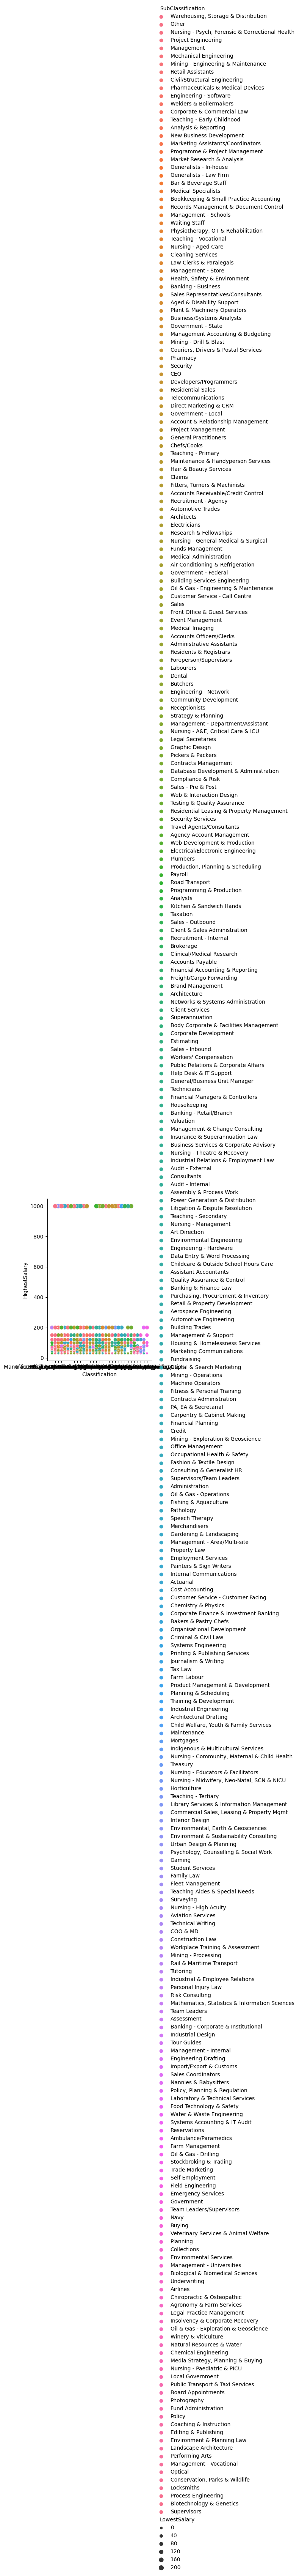

In [51]:
sns.relplot(x='Classification',y='HighestSalary',data=df2,kind='scatter',hue='SubClassification',size='LowestSalary')

In [52]:
from sklearn.decomposition import PCA as sklearnPCA
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url,header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
y = data[4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

In [54]:
x = data.iloc[:,0:4]
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
location_list = df2['Location'].tolist()
print(location_list)

['Melbourne', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Other', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Perth', 'Sydney', 'Perth', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Perth', 'Wollongong, Illawarra & South Coast', 'Perth', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Brisbane', 'Perth', 'ACT', 'Brisbane', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Perth', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Melbourne', 'Blue Mountains & Central West', 'Brisbane', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Melbourne', 'Other', 'Launceston & North East', 'Melbourne', 'Oth

In [56]:
LowestSalary_list = df2['LowestSalary'].tolist()
print(LowestSalary_list)

[50, 120, 100, 0, 50, 40, 150, 30, 40, 200, 30, 0, 40, 0, 80, 70, 40, 70, 0, 150, 0, 70, 100, 0, 70, 150, 60, 50, 200, 0, 50, 0, 0, 80, 200, 200, 150, 0, 100, 30, 120, 70, 30, 60, 120, 60, 70, 0, 120, 120, 30, 30, 40, 100, 60, 0, 40, 30, 150, 30, 50, 60, 50, 150, 70, 70, 0, 120, 40, 0, 120, 100, 0, 50, 0, 50, 30, 100, 60, 100, 0, 0, 0, 0, 80, 120, 40, 200, 100, 40, 40, 60, 200, 0, 80, 40, 70, 70, 120, 0, 150, 150, 50, 200, 200, 120, 60, 50, 120, 70, 50, 30, 70, 100, 30, 60, 70, 60, 0, 0, 0, 150, 200, 80, 80, 40, 100, 30, 120, 40, 150, 0, 0, 0, 150, 100, 0, 0, 30, 60, 30, 80, 40, 40, 120, 50, 150, 80, 0, 70, 70, 60, 40, 80, 50, 70, 50, 120, 70, 100, 30, 70, 0, 70, 0, 50, 80, 150, 40, 50, 120, 0, 30, 80, 40, 60, 120, 100, 70, 100, 200, 40, 40, 70, 40, 70, 80, 100, 120, 0, 200, 50, 0, 120, 0, 0, 0, 100, 40, 150, 0, 60, 40, 60, 100, 100, 0, 70, 40, 70, 0, 70, 150, 50, 70, 80, 0, 80, 40, 40, 30, 30, 60, 100, 0, 60, 100, 70, 0, 30, 40, 80, 200, 120, 80, 0, 70, 200, 120, 0, 40, 120, 0, 70, 50

In [57]:
HighestSalary_list = df2['HighestSalary'].tolist()
print(HighestSalary_list)

[60, 150, 120, 30, 60, 50, 200, 40, 50, 999, 40, 30, 50, 30, 100, 80, 50, 80, 30, 200, 30, 80, 120, 30, 80, 200, 70, 60, 999, 30, 60, 30, 30, 100, 999, 999, 200, 30, 120, 40, 150, 80, 40, 70, 150, 70, 80, 30, 150, 150, 40, 40, 50, 120, 70, 30, 50, 40, 200, 40, 60, 70, 60, 200, 80, 80, 30, 150, 50, 30, 150, 120, 30, 60, 30, 60, 40, 120, 70, 120, 30, 30, 30, 30, 100, 150, 50, 999, 120, 50, 50, 70, 999, 30, 100, 50, 80, 80, 150, 30, 200, 200, 60, 999, 999, 150, 70, 60, 150, 80, 60, 40, 80, 120, 40, 70, 80, 70, 30, 30, 30, 200, 999, 100, 100, 50, 120, 40, 150, 50, 200, 30, 30, 30, 200, 120, 30, 30, 40, 70, 40, 100, 50, 50, 150, 60, 200, 100, 30, 80, 80, 70, 50, 100, 60, 80, 60, 150, 80, 120, 40, 80, 30, 80, 30, 60, 100, 200, 50, 60, 150, 30, 40, 100, 50, 70, 150, 120, 80, 120, 999, 50, 50, 80, 50, 80, 100, 120, 150, 30, 999, 60, 30, 150, 30, 30, 30, 120, 50, 200, 30, 70, 50, 70, 120, 120, 30, 80, 50, 80, 30, 80, 200, 60, 80, 100, 30, 100, 50, 50, 40, 40, 70, 120, 30, 70, 120, 80, 30, 40, 5

In [58]:
new_menu = ['Melbourne', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Other', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Perth', 'Sydney', 'Perth', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Perth', 'Wollongong, Illawarra & South Coast', 'Perth', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Brisbane', 'Perth', 'ACT', 'Brisbane', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Perth', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Melbourne', 'Blue Mountains & Central West', 'Brisbane', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Melbourne', 'Other', 'Launceston & North East', 'Melbourne', 'Other', 'Horsham & Grampians', 'Other', 'Melbourne', 'Other', 'Coober Pedy & Outback SA', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Sydney', 'Perth', 'Adelaide', 'Other', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Melbourne', 'Northern QLD', 'Melbourne', 'ACT', 'Adelaide', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Other', 'Bairnsdale & Gippsland', 'Other', 'Melbourne', 'Rockhampton & Capricorn Coast', 'Sydney', 'Gold Coast', 'Sydney', 'Mackay & Coalfields', 'Other', 'Sydney', 'Other', 'Other', 'Mackay & Coalfields', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Bundaberg & Wide Bay Burnett', 'Melbourne', 'Melbourne', 'Gosford & Central Coast', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Darwin', 'Bunbury & South West', 'Blue Mountains & Central West', 'Northern QLD', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Darwin', 'Melbourne', 'Other', 'Other', 'Horsham & Grampians', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Cairns & Far North', 'ACT', 'ACT', 'Sydney', 'Whyalla & Eyre Peninsula', 'Other', 'Brisbane', 'Sydney', 'Perth', 'Gosford & Central Coast', 'Hobart', 'South West Coast VIC', 'Other', 'Other', 'Other', 'Yarra Valley & High Country', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Brisbane', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Perth', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Other', 'Katherine & Northern Australia', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Adelaide', 'Perth', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Brisbane', 'Perth', 'Cairns & Far North', 'Gosford & Central Coast', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Mackay & Coalfields', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Melbourne', 'Perth', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Adelaide', 'Perth', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sunshine Coast', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Mackay & Coalfields', 'Newcastle, Maitland & Hunter', 'Perth', 'Melbourne', 'Port Macquarie & Mid North Coast', 'Brisbane', 'Adelaide', 'ACT', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'ACT', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Mildura & Murray', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Hobart', 'Other', 'Sydney', 'Other', 'Brisbane', 'Northern QLD', 'Melbourne', 'Melbourne', 'Other', 'Adelaide', 'Brisbane', 'Melbourne', 'Melbourne', 'Adelaide', 'Gosford & Central Coast', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Mackay & Coalfields', 'West Gippsland & Latrobe Valley', 'Other', 'Melbourne', 'Other', 'Other', 'Sunshine Coast', 'Melbourne', 'Sydney', 'Port Macquarie & Mid North Coast', 'Other', 'Sydney', 'Brisbane', 'Other', 'South West Coast VIC', 'Sydney', 'Other', 'Other', 'Melbourne', 'Ballarat & Central Highlands', 'Brisbane', 'Other', 'Other', 'Launceston & North East', 'Newcastle, Maitland & Hunter', 'Adelaide Hills & Barossa', 'Dubbo & Central NSW', 'Horsham & Grampians', 'Sydney', 'Perth', 'Melbourne', 'Sydney', 'Melbourne', 'Northern QLD', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'ACT', 'Other', 'Brisbane', 'ACT', 'Sydney', 'Other', 'Darwin', 'Other', 'Port Macquarie & Mid North Coast', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Adelaide', 'Other', 'Adelaide', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Perth', 'Hobart', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Southern Highlands & Tablelands', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'ACT', 'Sydney', 'Perth', 'Sydney', 'Adelaide', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Hobart', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Northern QLD', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Perth', 'Northern QLD', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Melbourne', 'Bunbury & South West', 'Geraldton, Gascoyne & Midwest', 'Other', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Gosford & Central Coast', 'Gladstone & Central QLD', 'Brisbane', 'Melbourne', 'South West Coast VIC', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Gladstone & Central QLD', 'Sunshine Coast', 'ACT', 'Sydney', 'Other', 'Darwin', 'Other', 'Mt Gambier & Limestone Coast', 'Other', 'Sydney', 'Sydney', 'Geraldton, Gascoyne & Midwest', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Gold Coast', 'Other', 'Other', 'Adelaide', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Shepparton & Goulburn Valley', 'Melbourne', 'Other', 'Sydney', 'Perth', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Bundaberg & Wide Bay Burnett', 'Melbourne', 'Brisbane', 'Other', 'Mackay & Coalfields', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Perth', 'Brisbane', 'Darwin', 'Sydney', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Wagga Wagga & Riverina', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Adelaide', 'Other', 'Rockhampton & Capricorn Coast', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Southern Highlands & Tablelands', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Sydney', 'Other', 'Adelaide', 'ACT', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'ACT', 'Devonport & North West', 'Other', 'Sydney', 'Other', 'Other', 'Toowoomba & Darling Downs', 'Other', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Lismore & Far North Coast', 'Sydney', 'Sydney', 'Cairns & Far North', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Toowoomba & Darling Downs', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Lismore & Far North Coast', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Wagga Wagga & Riverina', 'Rockhampton & Capricorn Coast', 'Melbourne', 'Sydney', 'Bundaberg & Wide Bay Burnett', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Melbourne', 'Perth', 'Melbourne', 'Northern QLD', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'West Gippsland & Latrobe Valley', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Perth', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Yarra Valley & High Country', 'Sydney', 'Perth', 'Brisbane', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Hobart', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Other', 'Perth', 'Sydney', 'Other', 'Darwin', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Perth', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Newcastle, Maitland & Hunter', 'Richmond & Hawkesbury', 'Other', 'Sydney', 'Melbourne', 'Other', 'Northern QLD', 'Other', 'Newcastle, Maitland & Hunter', 'Western QLD', 'Other', 'Other', 'Other', 'Perth', 'ACT', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Other', 'Western QLD', 'Melbourne', 'Coffs Harbour & North Coast', 'Brisbane', 'Albury Area', 'Sydney', 'Other', 'Other', 'Adelaide', 'Brisbane', 'Perth', 'Sydney', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Sunshine Coast', 'Other', 'Sydney', 'Other', 'Sunshine Coast', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Sydney', 'Perth', 'Perth', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'Sydney', 'Other', 'Other', 'Sydney', 'Southern Highlands & Tablelands', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Newcastle, Maitland & Hunter', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Albury Area', 'South West Coast VIC', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Mackay & Coalfields', 'Other', 'Other', 'Melbourne', 'Adelaide', 'Other', 'Gladstone & Central QLD', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Perth', 'Sunshine Coast', 'Gosford & Central Coast', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'South West Coast VIC', 'Other', 'Sydney', 'Sydney', 'Alice Springs & Central Australia', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'ACT', 'Other', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Brisbane', 'Sydney', 'Perth', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Adelaide', 'Katherine & Northern Australia', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Adelaide', 'Darwin', 'Other', 'Other', 'Western QLD', 'Brisbane', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Shepparton & Goulburn Valley', 'Other', 'Sydney', 'Melbourne', 'Gosford & Central Coast', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Brisbane', 'Sydney', 'Darwin', 'Mackay & Coalfields', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Lismore & Far North Coast', 'Melbourne', 'Perth', 'Sydney', 'Other', 'Sydney', 'Sydney', 'West Gippsland & Latrobe Valley', 'Other', 'Brisbane', 'Sydney', 'Newcastle, Maitland & Hunter', 'Gosford & Central Coast', 'Melbourne', 'Other', 'Melbourne', 'Adelaide', 'Ballarat & Central Highlands', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Mackay & Coalfields', 'Melbourne', 'Melbourne', 'Brisbane', 'Melbourne', 'Other', 'West Gippsland & Latrobe Valley', 'Other', 'Other', 'Brisbane', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Other', 'Other', 'Ballarat & Central Highlands', 'Other', 'Melbourne', 'Gold Coast', 'Other', 'Sydney', 'Adelaide', 'ACT', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Perth', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Mackay & Coalfields', 'Mackay & Coalfields', 'Melbourne', 'Other', 'Sydney', 'Adelaide', 'Sydney', 'Gladstone & Central QLD', 'Sydney', 'Other', 'Brisbane', 'Dubbo & Central NSW', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'ACT', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Riverland & Murray Mallee', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Port Macquarie & Mid North Coast', 'Wollongong, Illawarra & South Coast', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Cairns & Far North', 'Other', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Brisbane', 'Dubbo & Central NSW', 'Sydney', 'Brisbane', 'South West Coast VIC', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Western QLD', 'Other', 'Katherine & Northern Australia', 'Other', 'Other', 'Sunshine Coast', 'Melbourne', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Gold Coast', 'Other', 'Sunshine Coast', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Sydney', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Gold Coast', 'Melbourne', 'Sydney', 'Gosford & Central Coast', 'Other', 'Other', 'Sydney', 'Other', 'Northern QLD', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Gladstone & Central QLD', 'Other', 'Sydney', 'Other', 'Melbourne', 'West Gippsland & Latrobe Valley', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Adelaide Hills & Barossa', 'Melbourne', 'ACT', 'Sydney', 'ACT', 'Other', 'Perth', 'Melbourne', 'Hobart', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Tamworth & North West NSW', 'Sydney', 'Other', 'Melbourne', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Toowoomba & Darling Downs', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Other', 'Adelaide', 'Melbourne', 'Adelaide', 'Melbourne', 'Sunshine Coast', 'Other', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Western QLD', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Adelaide', 'Sydney', 'Mackay & Coalfields', 'Other', 'Port Hedland, Karratha & Pilbara', 'Perth', 'Melbourne', 'Wagga Wagga & Riverina', 'Gold Coast', 'Rockhampton & Capricorn Coast', 'Other', 'Other', 'South West Coast VIC', 'Brisbane', 'Adelaide', 'Sydney', 'Perth', 'Port Macquarie & Mid North Coast', 'Brisbane', 'Melbourne', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Perth', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Gosford & Central Coast', 'Wollongong, Illawarra & South Coast', 'Perth', 'Melbourne', 'Sydney', 'ACT', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Far West & North Central NSW', 'Sydney', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Dubbo & Central NSW', 'Adelaide', 'Other', 'Gold Coast', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sunshine Coast', 'Melbourne', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Gosford & Central Coast', 'Other', 'Other', 'Melbourne', 'Northern QLD', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Adelaide', 'Other', 'Sydney', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Shepparton & Goulburn Valley', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Other', 'ACT', 'Other', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Hobart', 'Sydney', 'Melbourne', 'Southern Highlands & Tablelands', 'Other', 'Northern QLD', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Sydney', 'Dubbo & Central NSW', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Western QLD', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Perth', 'Lismore & Far North Coast', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Dubbo & Central NSW', 'Sydney', 'Other', 'Perth', 'Sydney', 'Sydney', 'Other', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Mornington Peninsula & Bass Coast', 'Toowoomba & Darling Downs', 'Perth', 'Perth', 'Brisbane', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Mt Gambier & Limestone Coast', 'Melbourne', 'Other', 'Brisbane', 'Shepparton & Goulburn Valley', 'Gold Coast', 'Rockhampton & Capricorn Coast', 'Melbourne', 'Melbourne', 'Melbourne', 'Melbourne', 'Mornington Peninsula & Bass Coast', 'Other', 'Northern QLD', 'Adelaide', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'ACT', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Cairns & Far North', 'Other', 'Melbourne', 'Brisbane', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Newcastle, Maitland & Hunter', 'Rockhampton & Capricorn Coast', 'Richmond & Hawkesbury', 'Sydney', 'Melbourne', 'Melbourne', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Lismore & Far North Coast', 'Other', 'Adelaide', 'Other', 'Darwin', 'Melbourne', 'Sydney', 'Shepparton & Goulburn Valley', 'Perth', 'Melbourne', 'Adelaide', 'Other', 'Other', 'Bairnsdale & Gippsland', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Adelaide', 'Perth', 'Other', 'Sydney', 'Other', 'Adelaide', 'ACT', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Sydney', 'Cairns & Far North', 'Other', 'Rockhampton & Capricorn Coast', 'Western QLD', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Brisbane', 'Northam & Wheatbelt', 'Hobart', 'Northern QLD', 'Perth', 'Bunbury & South West', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Brisbane', 'Hobart', 'Northern QLD', 'Melbourne', 'Melbourne', 'Rockhampton & Capricorn Coast', 'Brisbane', 'Perth', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'ACT', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Northern QLD', 'Sydney', 'Other', 'Other', 'Other', 'Perth', 'Sydney', 'Other', 'Northern QLD', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Northern QLD', 'Melbourne', 'Melbourne', 'Dubbo & Central NSW', 'ACT', 'Northern QLD', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Tamworth & North West NSW', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Sydney', 'Western QLD', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Other', 'Perth', 'Gold Coast', 'Other', 'Other', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Adelaide', 'Gosford & Central Coast', 'Western QLD', 'Other', 'Sydney', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Other', 'Melbourne', 'Adelaide', 'Broome & Kimberley', 'Other', 'Other', 'Sydney', 'Brisbane', 'Brisbane', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Sydney', 'Adelaide', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Perth', 'Mildura & Murray', 'Melbourne', 'Sydney', 'Western QLD', 'Other', 'Sydney', 'Albury Area', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Yarra Valley & High Country', 'Other', 'Sydney', 'Other', 'Other', 'Fleurieu Peninsula & Kangaroo Island', 'Brisbane', 'Other', 'Other', 'Tamworth & North West NSW', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Hervey Bay & Fraser Coast', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Gold Coast', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Brisbane', 'Other', 'Other', 'Darwin', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'ACT', 'Newcastle, Maitland & Hunter', 'Other', 'Northern QLD', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Devonport & North West', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Sydney', 'Perth', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Wagga Wagga & Riverina', 'Other', 'Melbourne', 'Melbourne', 'Perth', 'Melbourne', 'Melbourne', 'Northern QLD', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Other', 'Perth', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Perth', 'Sydney', 'South West Coast VIC', 'Brisbane', 'Wollongong, Illawarra & South Coast', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Brisbane', 'Other', 'Sydney', 'Other', 'Brisbane', 'Bunbury & South West', 'Other', 'Other', 'Perth', 'Sydney', 'Adelaide', 'Other', 'Northern QLD', 'Other', 'Gold Coast', 'Melbourne', 'Perth', 'Other', 'Sydney', 'Perth', 'Perth', 'Wagga Wagga & Riverina', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Adelaide', 'Other', 'Sydney', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Melbourne', 'Melbourne', 'Perth', 'Perth', 'Bunbury & South West', 'Other', 'Other', 'Mackay & Coalfields', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Northern QLD', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Coober Pedy & Outback SA', 'Sydney', 'Geraldton, Gascoyne & Midwest', 'Bairnsdale & Gippsland', 'Shepparton & Goulburn Valley', 'Wagga Wagga & Riverina', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Bundaberg & Wide Bay Burnett', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Gold Coast', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Western QLD', 'Tamworth & North West NSW', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Gold Coast', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Gold Coast', 'Melbourne', 'Sydney', 'Other', 'Sunshine Coast', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Adelaide', 'Sydney', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Sydney', 'Adelaide', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Other', 'ACT', 'Sydney', 'Other', 'Perth', 'Other', 'Sydney', 'South West Coast VIC', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Brisbane', 'Katherine & Northern Australia', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Other', 'Other', 'Northern QLD', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Cairns & Far North', 'Sydney', 'Other', 'Other', 'Sydney', 'Brisbane', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'ACT', 'Other', 'Brisbane', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Perth', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'ACT', 'Other', 'Other', 'ACT', 'Perth', 'ACT', 'Other', 'Sydney', 'Other', 'Sydney', 'Gold Coast', 'South West Coast VIC', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Gladstone & Central QLD', 'Other', 'Melbourne', 'Brisbane', 'Newcastle, Maitland & Hunter', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Adelaide', 'Sydney', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Richmond & Hawkesbury', 'Port Hedland, Karratha & Pilbara', 'ACT', 'Sydney', 'Melbourne', 'Mornington Peninsula & Bass Coast', 'Gold Coast', 'Melbourne', 'Mackay & Coalfields', 'Cairns & Far North', 'Brisbane', 'Sydney', 'Perth', 'ACT', 'Albury Area', 'Sydney', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Sydney', 'Other', 'Perth', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Melbourne', 'Dubbo & Central NSW', 'Gold Coast', 'Melbourne', 'Melbourne', 'Melbourne', 'Gold Coast', 'ACT', 'Sydney', 'Other', 'Sydney', 'Yarra Valley & High Country', 'Other', 'South West Coast VIC', 'Sydney', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Sydney', 'Wagga Wagga & Riverina', 'Melbourne', 'Melbourne', 'Perth', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Sunshine Coast', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Adelaide', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Perth', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Sydney', 'Coober Pedy & Outback SA', 'Other', 'Melbourne', 'South West Coast VIC', 'Sydney', 'Sunshine Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Sunshine Coast', 'Other', 'Other', 'Melbourne', 'ACT', 'Melbourne', 'Sydney', 'Perth', 'Adelaide', 'ACT', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Gladstone & Central QLD', 'South West Coast VIC', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Yarra Valley & High Country', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Brisbane', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Adelaide', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Sydney', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Brisbane', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Perth', 'Brisbane', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Mornington Peninsula & Bass Coast', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'West Gippsland & Latrobe Valley', 'Other', 'Perth', 'Other', 'Sydney', 'Perth', 'Sydney', 'Other', 'Brisbane', 'Alice Springs & Central Australia', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'ACT', 'Melbourne', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Melbourne', 'Mildura & Murray', 'Sydney', 'Other', 'Other', 'Perth', 'Other', 'Northern QLD', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'ACT', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Adelaide', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Other', 'Other', 'Katherine & Northern Australia', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Perth', 'Other', 'Mackay & Coalfields', 'Melbourne', 'Other', 'Adelaide', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Perth', 'Sydney', 'Perth', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Perth', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Newcastle, Maitland & Hunter', 'Sunshine Coast', 'Gold Coast', 'Other', 'Melbourne', 'Other', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Gladstone & Central QLD', 'Other', 'Brisbane', 'ACT', 'South West Coast VIC', 'Sydney', 'Adelaide', 'Other', 'Sydney', 'Other', 'Cairns & Far North', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Shepparton & Goulburn Valley', 'Other', 'Blue Mountains & Central West', 'ACT', 'Other', 'Melbourne', 'Mackay & Coalfields', 'Sydney', 'Sydney', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Gosford & Central Coast', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Mackay & Coalfields', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'West Gippsland & Latrobe Valley', 'Sydney', 'Melbourne', 'Sydney', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'ACT', 'Sydney', 'Sydney', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Other', 'Melbourne', 'ACT', 'Melbourne', 'Other', 'Sydney', 'Other', 'Albury Area', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Ballarat & Central Highlands', 'Sydney', 'Sydney', 'Other', 'South West Coast VIC', 'Sydney', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Darwin', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Brisbane', 'Sydney', 'Gold Coast', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Albury Area', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Hobart', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Northern QLD', 'Melbourne', 'Perth', 'Other', 'Other', 'Sydney', 'Other', 'Gold Coast', 'Brisbane', 'South West Coast VIC', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Gold Coast', 'Melbourne', 'Wagga Wagga & Riverina', 'Brisbane', 'Sydney', 'Other', 'Other', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Riverland & Murray Mallee', 'Sydney', 'Other', 'Perth', 'Bundaberg & Wide Bay Burnett', 'Brisbane', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Coober Pedy & Outback SA', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Gold Coast', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Mt Gambier & Limestone Coast', 'Melbourne', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Adelaide', 'Other', 'Adelaide', 'Perth', 'Melbourne', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Gosford & Central Coast', 'Other', 'Bunbury & South West', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Brisbane', 'Other', 'Melbourne', 'Toowoomba & Darling Downs', 'Other', 'Adelaide', 'Other', 'Sydney', 'Tamworth & North West NSW', 'Mackay & Coalfields', 'Brisbane', 'Other', 'Port Hedland, Karratha & Pilbara', 'Other', 'Melbourne', 'Other', 'Alice Springs & Central Australia', 'Wagga Wagga & Riverina', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Other', 'Hobart', 'Melbourne', 'Other', 'Brisbane', 'ACT', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Dubbo & Central NSW', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'ACT', 'Sydney', 'Other', 'Sunshine Coast', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'ACT', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Western QLD', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Devonport & North West', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Cairns & Far North', 'Northam & Wheatbelt', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Perth', 'Sydney', 'ACT', 'Bundaberg & Wide Bay Burnett', 'South West Coast VIC', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'ACT', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Brisbane', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Brisbane', 'Brisbane', 'Other', 'Brisbane', 'Melbourne', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Adelaide', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Sydney', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Sydney', 'Melbourne', 'South West Coast VIC', 'Other', 'Other', 'Perth', 'Newcastle, Maitland & Hunter', 'Other', 'Perth', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Darwin', 'Other', 'Other', 'Melbourne', 'ACT', 'Other', 'Other', 'Other', 'Adelaide', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Sydney', 'Sydney', 'Gold Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'South West Coast VIC', 'Other', 'Katherine & Northern Australia', 'Brisbane', 'Melbourne', 'Albury Area', 'Brisbane', 'Sydney', 'Devonport & North West', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Perth', 'Other', 'Brisbane', 'Dubbo & Central NSW', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Wollongong, Illawarra & South Coast', 'Perth', 'Brisbane', 'Other', 'Perth', 'Sydney', 'Other', 'ACT', 'Other', 'Toowoomba & Darling Downs', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Adelaide', 'Sydney', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Other', 'Adelaide', 'Other', 'Other', 'Brisbane', 'Western QLD', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Tamworth & North West NSW', 'Mackay & Coalfields', 'Melbourne', 'Other', 'Other', 'Gold Coast', 'Other', 'Other', 'Coffs Harbour & North Coast', 'Melbourne', 'Northern QLD', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Darwin', 'Melbourne', 'Brisbane', 'Other', 'Adelaide', 'Adelaide', 'Other', 'Albany & Great Southern', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'South West Coast VIC', 'Sydney', 'Sydney', 'Brisbane', 'Perth', 'Melbourne', 'Melbourne', 'Adelaide', 'Brisbane', 'Other', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Tamworth & North West NSW', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Other', 'Sydney', 'Ballarat & Central Highlands', 'ACT', 'Sydney', 'Other', 'Gosford & Central Coast', 'Other', 'Sydney', 'Other', 'Cairns & Far North', 'Cairns & Far North', 'Sydney', 'Melbourne', 'Perth', 'Sydney', 'Lismore & Far North Coast', 'Newcastle, Maitland & Hunter', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Gold Coast', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Brisbane', 'Mackay & Coalfields', 'Adelaide', 'Adelaide', 'Sydney', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'Other', 'Mackay & Coalfields', 'Sydney', 'Other', 'Hobart', 'Other', 'Sydney', 'Adelaide', 'Sydney', 'Other', 'Cairns & Far North', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'ACT', 'Other', 'Sydney', 'Perth', 'Blue Mountains & Central West', 'Melbourne', 'Perth', 'Other', 'Port Hedland, Karratha & Pilbara', 'Lismore & Far North Coast', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Blue Mountains & Central West', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Melbourne', 'Sunshine Coast', 'ACT', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Wagga Wagga & Riverina', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'South West Coast VIC', 'Brisbane', 'Sydney', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Rockhampton & Capricorn Coast', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Lismore & Far North Coast', 'Other', 'ACT', 'Sydney', 'Sydney', 'Perth', 'ACT', 'Melbourne', 'Other', 'Mackay & Coalfields', 'ACT', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Sunshine Coast', 'Other', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Other', 'Sydney', 'Darwin', 'Brisbane', 'Other', 'Other', 'Ballarat & Central Highlands', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Gold Coast', 'Other', 'Other', 'Brisbane', 'Other', 'Brisbane', 'Brisbane', 'Perth', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Sydney', 'Melbourne', 'Gold Coast', 'Other', 'ACT', 'Other', 'Western QLD', 'Gold Coast', 'Other', 'Perth', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Sydney', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Bunbury & South West', 'Other', 'Newcastle, Maitland & Hunter', 'Gold Coast', 'Melbourne', 'Other', 'ACT', 'Sydney', 'Gold Coast', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Sydney', 'Sydney', 'Brisbane', 'Brisbane', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Gold Coast', 'Brisbane', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Gosford & Central Coast', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Brisbane', 'Perth', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Broome & Kimberley', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Sydney', 'ACT', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Western QLD', 'Other', 'Whyalla & Eyre Peninsula', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Gold Coast', 'Wagga Wagga & Riverina', 'Melbourne', 'Devonport & North West', 'Perth', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Whyalla & Eyre Peninsula', 'Tamworth & North West NSW', 'Melbourne', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Somerset & Lockyer', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Hobart', 'Other', 'Brisbane', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Adelaide', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Cairns & Far North', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Sydney', 'Gosford & Central Coast', 'Sydney', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Melbourne', 'Melbourne', 'Perth', 'Adelaide', 'ACT', 'Melbourne', 'Other', 'ACT', 'Other', 'Lismore & Far North Coast', 'Melbourne', 'ACT', 'Other', 'Other', 'Other', 'Yorke Peninsula & Clare Valley', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Gosford & Central Coast', 'Other', 'Other', 'Other', 'Adelaide', 'Other', 'Sydney', 'Sydney', 'Shepparton & Goulburn Valley', 'Brisbane', 'Brisbane', 'Perth', 'Melbourne', 'Other', 'Gold Coast', 'ACT', 'Sydney', 'Newcastle, Maitland & Hunter', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Other', 'Geraldton, Gascoyne & Midwest', 'Sydney', 'Sydney', 'Perth', 'Newcastle, Maitland & Hunter', 'Other', 'Melbourne', 'Northern QLD', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Dubbo & Central NSW', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Perth', 'Dubbo & Central NSW', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Sydney', 'Other', 'Rockhampton & Capricorn Coast', 'Other', 'Other', 'Sydney', 'Mackay & Coalfields', 'Sydney', 'Sydney', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Melbourne', 'South West Coast VIC', 'Other', 'Brisbane', 'Brisbane', 'Western QLD', 'Other', 'Other', 'Perth', 'Perth', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'South West Coast VIC', 'Northern QLD', 'Gold Coast', 'Other', 'Adelaide', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Sydney', 'Adelaide', 'Bundaberg & Wide Bay Burnett', 'South West Coast VIC', 'ACT', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'Lismore & Far North Coast', 'Darwin', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Lismore & Far North Coast', 'Brisbane', 'Brisbane', 'Perth', 'Melbourne', 'Other', 'Bairnsdale & Gippsland', 'Perth', 'Dubbo & Central NSW', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Adelaide', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Brisbane', 'Launceston & North East', 'Adelaide', 'Bunbury & South West', 'Geraldton, Gascoyne & Midwest', 'Sydney', 'Northern QLD', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'Perth', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Northern QLD', 'Melbourne', 'Melbourne', 'Adelaide', 'Brisbane', 'Other', 'Other', 'Perth', 'Melbourne', 'Wagga Wagga & Riverina', 'Brisbane', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Devonport & North West', 'Melbourne', 'Brisbane', 'Hobart', 'Sydney', 'Other', 'Other', 'Northern QLD', 'Cairns & Far North', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Other', 'Horsham & Grampians', 'Other', 'Sydney', 'Perth', 'Port Hedland, Karratha & Pilbara', 'Gold Coast', 'Other', 'South West Coast VIC', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Blue Mountains & Central West', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Adelaide', 'Other', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Brisbane', 'Sydney', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'ACT', 'Mandurah & Peel', 'Melbourne', 'Brisbane', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Adelaide Hills & Barossa', 'Gold Coast', 'Other', 'Other', 'Bunbury & South West', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Other', 'Sydney', 'Other', 'Brisbane', 'Mackay & Coalfields', 'Sydney', 'Perth', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Brisbane', 'Rockhampton & Capricorn Coast', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Gold Coast', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Gold Coast', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sunshine Coast', 'Gold Coast', 'Perth', 'Sydney', 'Sydney', 'Other', 'South West Coast VIC', 'West Gippsland & Latrobe Valley', 'Other', 'Sydney', 'Gosford & Central Coast', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'Mt Gambier & Limestone Coast', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'ACT', 'Sydney', 'ACT', 'Other', 'Other', 'ACT', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Northern QLD', 'Central & South East TAS', 'Adelaide', 'Other', 'ACT', 'Other', 'Other', 'Brisbane', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Sunshine Coast', 'Sydney', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Far West & North Central NSW', 'Melbourne', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Port Macquarie & Mid North Coast', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Fleurieu Peninsula & Kangaroo Island', 'Other', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Whyalla & Eyre Peninsula', 'Toowoomba & Darling Downs', 'Other', 'Melbourne', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Other', 'Whyalla & Eyre Peninsula', 'Melbourne', 'Brisbane', 'Brisbane', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Mackay & Coalfields', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Brisbane', 'Perth', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Perth', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Gold Coast', 'Perth', 'Sydney', 'Sydney', 'Other', 'Cairns & Far North', 'Other', 'Other', 'Sydney', 'Brisbane', 'West Gippsland & Latrobe Valley', 'Mt Gambier & Limestone Coast', 'Other', 'Sydney', 'Melbourne', 'ACT', 'Newcastle, Maitland & Hunter', 'Adelaide', 'Other', 'West Gippsland & Latrobe Valley', 'Sydney', 'Brisbane', 'Wagga Wagga & Riverina', 'Brisbane', 'Adelaide', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Perth', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Darwin', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Other', 'Sydney', 'Wagga Wagga & Riverina', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Northern QLD', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'South West Coast VIC', 'Other', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Gold Coast', 'Perth', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Sunshine Coast', 'Melbourne', 'Melbourne', 'Blue Mountains & Central West', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Other', 'South West Coast VIC', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'ACT', 'Sydney', 'Other', 'Brisbane', 'Albany & Great Southern', 'Brisbane', 'Other', 'Albury Area', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Sydney', 'Perth', 'Brisbane', 'Other', 'Sydney', 'Adelaide', 'Melbourne', 'Brisbane', 'Other', 'Adelaide', 'Other', 'Mackay & Coalfields', 'Port Hedland, Karratha & Pilbara', 'Other', 'Brisbane', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Wagga Wagga & Riverina', 'Melbourne', 'Bundaberg & Wide Bay Burnett', 'Melbourne', 'Riverland & Murray Mallee', 'Other', 'Adelaide', 'Sydney', 'Newcastle, Maitland & Hunter', 'Sydney', 'Sunshine Coast', 'Brisbane', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'Brisbane', 'Other', 'Other', 'Other', 'Wagga Wagga & Riverina', 'Melbourne', 'Sydney', 'Southern Highlands & Tablelands', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'South West Coast VIC', 'Other', 'Wagga Wagga & Riverina', 'Brisbane', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Somerset & Lockyer', 'Sydney', 'Other', 'Adelaide', 'Other', 'Other', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'West Gippsland & Latrobe Valley', 'Blue Mountains & Central West', 'Sydney', 'ACT', 'Other', 'Sydney', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Tumut, Snowy & Monaro', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Gold Coast', 'Riverland & Murray Mallee', 'Perth', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Sydney', 'Perth', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Melbourne', 'Sydney', 'Other', 'Perth', 'South West Coast VIC', 'Melbourne', 'Brisbane', 'Ballarat & Central Highlands', 'Other', 'Sunshine Coast', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Other', 'Sydney', 'ACT', 'Perth', 'Other', 'Brisbane', 'Darwin', 'Adelaide', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Melbourne', 'Other', 'Brisbane', 'Sunshine Coast', 'Melbourne', 'Sydney', 'Perth', 'Other', 'Perth', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Tamworth & North West NSW', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'ACT', 'Sydney', 'Melbourne', 'Other', 'Hobart', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Blue Mountains & Central West', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Adelaide', 'Toowoomba & Darling Downs', 'Sydney', 'Other', 'Other', 'Perth', 'Sydney', 'Sydney', 'Other', 'Other', 'South West Coast VIC', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Wagga Wagga & Riverina', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Cairns & Far North', 'Gladstone & Central QLD', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'South West Coast VIC', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'South West Coast VIC', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Cairns & Far North', 'Other', 'Brisbane', 'Other', 'Perth', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Cairns & Far North', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Sydney', 'Blue Mountains & Central West', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'ACT', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Perth', 'Brisbane', 'Adelaide', 'Other', 'Other', 'Northern QLD', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Dubbo & Central NSW', 'ACT', 'Adelaide', 'Other', 'Other', 'Other', 'Melbourne', 'Perth', 'Geraldton, Gascoyne & Midwest', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Bunbury & South West', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Gold Coast', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Adelaide', 'Other', 'Sydney', 'Sydney', 'Blue Mountains & Central West', 'Adelaide', 'Other', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Other', 'ACT', 'Bairnsdale & Gippsland', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Mornington Peninsula & Bass Coast', 'ACT', 'Melbourne', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'South West Coast VIC', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Other', 'ACT', 'Gold Coast', 'Melbourne', 'Sydney', 'Tamworth & North West NSW', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Adelaide', 'Other', 'Sydney', 'Coober Pedy & Outback SA', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Adelaide', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Hobart', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Gosford & Central Coast', 'Other', 'Brisbane', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Lismore & Far North Coast', 'Sydney', 'Shepparton & Goulburn Valley', 'Melbourne', 'Melbourne', 'Sydney', 'Gladstone & Central QLD', 'Adelaide', 'Sydney', 'ACT', 'Melbourne', 'Devonport & North West', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'South West Coast VIC', 'ACT', 'Cairns & Far North', 'Sydney', 'Other', 'Perth', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Tamworth & North West NSW', 'Other', 'ACT', 'Melbourne', 'Other', 'Other', 'Other', 'Darwin', 'Other', 'Other', 'Other', 'ACT', 'ACT', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Gold Coast', 'Brisbane', 'Sydney', 'Other', 'Cairns & Far North', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'ACT', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Katherine & Northern Australia', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Sydney', 'Darwin', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Sydney', 'Sydney', 'Melbourne', 'Port Hedland, Karratha & Pilbara', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Adelaide', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Other', 'Gosford & Central Coast', 'Melbourne', 'Perth', 'Other', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Sydney', 'Melbourne', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Perth', 'Sydney', 'Brisbane', 'South West Coast VIC', 'Sydney', 'Perth', 'Lismore & Far North Coast', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Adelaide', 'Other', 'Melbourne', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Perth', 'Perth', 'Melbourne', 'ACT', 'Other', 'Other', 'Sydney', 'Other', 'Coffs Harbour & North Coast', 'Bunbury & South West', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Geraldton, Gascoyne & Midwest', 'Other', 'Adelaide Hills & Barossa', 'Other', 'Other', 'Melbourne', 'Perth', 'Ballarat & Central Highlands', 'Sydney', 'Other', 'Melbourne', 'ACT', 'Sydney', 'Sydney', 'Sydney', 'ACT', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Dubbo & Central NSW', 'Gold Coast', 'Melbourne', 'Sydney', 'Coober Pedy & Outback SA', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Katherine & Northern Australia', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Coffs Harbour & North Coast', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Perth', 'Rockhampton & Capricorn Coast', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Perth', 'Other', 'Melbourne', 'Perth', 'Perth', 'Adelaide', 'Brisbane', 'Perth', 'Other', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Melbourne', 'Brisbane', 'ACT', 'Other', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Melbourne', 'Wagga Wagga & Riverina', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Adelaide', 'Sunshine Coast', 'Mornington Peninsula & Bass Coast', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Other', 'Gosford & Central Coast', 'Cairns & Far North', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Other', 'Toowoomba & Darling Downs', 'Melbourne', 'Darwin', 'Other', 'ACT', 'Other', 'Perth', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Dubbo & Central NSW', 'Perth', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Geraldton, Gascoyne & Midwest', 'Other', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Port Hedland, Karratha & Pilbara', 'Shepparton & Goulburn Valley', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Adelaide', 'Other', 'Other', 'Other', 'Other', 'Other', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Brisbane', 'Other', 'Other', 'Cairns & Far North', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'South West Coast VIC', 'Other', 'Other', 'Other', 'Brisbane', 'Mackay & Coalfields', 'Melbourne', 'Toowoomba & Darling Downs', 'Adelaide', 'Northern QLD', 'Other', 'Sydney', 'Perth', 'Coffs Harbour & North Coast', 'Sydney', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Adelaide', 'Other', 'Sydney', 'Sydney', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Gold Coast', 'Perth', 'Wagga Wagga & Riverina', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'South West Coast VIC', 'Rockhampton & Capricorn Coast', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Ballarat & Central Highlands', 'Other', 'Ballarat & Central Highlands', 'Other', 'Other', 'Ballarat & Central Highlands', 'Melbourne', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Southern Highlands & Tablelands', 'Other', 'Mackay & Coalfields', 'Melbourne', 'Brisbane', 'Other', 'Bairnsdale & Gippsland', 'Ballarat & Central Highlands', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Newcastle, Maitland & Hunter', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Sunshine Coast', 'Adelaide', 'Perth', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Ballarat & Central Highlands', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Adelaide', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Perth', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Sydney', 'Melbourne', 'Sunshine Coast', 'Brisbane', 'Melbourne', 'Other', 'Sunshine Coast', 'Sydney', 'Dubbo & Central NSW', 'Perth', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Cairns & Far North', 'Sydney', 'Sydney', 'Other', 'Western QLD', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Brisbane', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Other', 'Sydney', 'Brisbane', 'Perth', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Gold Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Darwin', 'Other', 'Sydney', 'Other', 'Perth', 'Sydney', 'ACT', 'Sydney', 'Other', 'Brisbane', 'ACT', 'Adelaide', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Rockhampton & Capricorn Coast', 'ACT', 'Other', 'Sydney', 'Brisbane', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'Other', 'Other', 'Sydney', 'ACT', 'Perth', 'Adelaide', 'Other', 'Darwin', 'Other', 'Gold Coast', 'Melbourne', 'Cairns & Far North', 'Sydney', 'Melbourne', 'Other', 'Lismore & Far North Coast', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Mornington Peninsula & Bass Coast', 'Mackay & Coalfields', 'Sydney', 'Other', 'Albany & Great Southern', 'Melbourne', 'Melbourne', 'Gold Coast', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Other', 'ACT', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Port Hedland, Karratha & Pilbara', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Adelaide', 'Devonport & North West', 'Other', 'Adelaide', 'Melbourne', 'Brisbane', 'Other', 'Brisbane', 'Other', 'ACT', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Melbourne', 'Melbourne', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'ACT', 'Sydney', 'Brisbane', 'Melbourne', 'Other', 'Dubbo & Central NSW', 'Sydney', 'Port Macquarie & Mid North Coast', 'Bairnsdale & Gippsland', 'Mt Gambier & Limestone Coast', 'Sydney', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Cairns & Far North', 'Sydney', 'Sydney', 'Toowoomba & Darling Downs', 'Sydney', 'Sydney', 'Perth', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Blue Mountains & Central West', 'Other', 'Melbourne', 'Sydney', 'Sunshine Coast', 'Melbourne', 'Melbourne', 'Mildura & Murray', 'ACT', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'ACT', 'Sydney', 'Sydney', 'South West Coast VIC', 'Other', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Darwin', 'Other', 'Melbourne', 'Melbourne', 'Gold Coast', 'Other', 'Perth', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Adelaide', 'Other', 'Other', 'Other', 'Perth', 'Mildura & Murray', 'Melbourne', 'Cairns & Far North', 'Other', 'ACT', 'Other', 'ACT', 'Melbourne', 'Other', 'Perth', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Perth', 'Sydney', 'Adelaide', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Sydney', 'Southern Highlands & Tablelands', 'Other', 'Sydney', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Other', 'Gold Coast', 'Melbourne', 'Melbourne', 'Other', 'Perth', 'Northern QLD', 'Melbourne', 'Sydney', 'Southern Highlands & Tablelands', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Brisbane', 'Melbourne', 'Perth', 'Melbourne', 'Sydney', 'Tamworth & North West NSW', 'Perth', 'Other', 'Gladstone & Central QLD', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Sunshine Coast', 'Other', 'Melbourne', 'Brisbane', 'Mornington Peninsula & Bass Coast', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'South West Coast VIC', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Mackay & Coalfields', 'Gold Coast', 'Sydney', 'Melbourne', 'Gladstone & Central QLD', 'Other', 'Other', 'Other', 'Other', 'Darwin', 'Melbourne', 'Other', 'Sydney', 'Coober Pedy & Outback SA', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Sunshine Coast', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Perth', 'Brisbane', 'Sydney', 'Perth', 'Sunshine Coast', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Other', 'Melbourne', 'Gold Coast', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Perth', 'Brisbane', 'Other', 'Western QLD', 'ACT', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Cairns & Far North', 'Other', 'Melbourne', 'Other', 'Gosford & Central Coast', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Perth', 'Perth', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Gold Coast', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Sunshine Coast', 'Other', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Sydney', 'Perth', 'Riverland & Murray Mallee', 'South West Coast VIC', 'Adelaide', 'Sydney', 'Sydney', 'Other', 'Other', 'Mornington Peninsula & Bass Coast', 'Other', 'Sydney', 'Cairns & Far North', 'Other', 'Northern QLD', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Mackay & Coalfields', 'Sydney', 'Brisbane', 'Mackay & Coalfields', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Port Hedland, Karratha & Pilbara', 'Other', 'Melbourne', 'Other', 'Western QLD', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Brisbane', 'Melbourne', 'Sydney', 'Perth', 'Sydney', 'Sydney', 'Other', 'Gold Coast', 'Other', 'Melbourne', 'Other', 'Lismore & Far North Coast', 'Newcastle, Maitland & Hunter', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'ACT', 'Hobart', 'Other', 'Perth', 'Sydney', 'Perth', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Adelaide Hills & Barossa', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'ACT', 'ACT', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sunshine Coast', 'Sydney', 'Other', 'Sydney', 'Adelaide', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Melbourne', 'Melbourne', 'Gosford & Central Coast', 'Other', 'Sydney', 'Shepparton & Goulburn Valley', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Adelaide', 'Other', 'Adelaide', 'Other', 'Melbourne', 'ACT', 'Other', 'Hobart', 'Gold Coast', 'Adelaide', 'Other', 'Other', 'Perth', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Mackay & Coalfields', 'Tumut, Snowy & Monaro', 'Adelaide', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Rockhampton & Capricorn Coast', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Southern Highlands & Tablelands', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Toowoomba & Darling Downs', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Gold Coast', 'Other', 'Sydney', 'Sydney', 'Mandurah & Peel', 'Melbourne', 'Perth', 'Other', 'Melbourne', 'South West Coast VIC', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Gosford & Central Coast', 'Northern QLD', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Mt Gambier & Limestone Coast', 'Sydney', 'Other', 'Sydney', 'ACT', 'Adelaide', 'Sydney', 'Sydney', 'Sydney', 'Perth', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'South West Coast VIC', 'Other', 'Other', 'Mornington Peninsula & Bass Coast', 'Melbourne', 'Brisbane', 'Adelaide', 'Melbourne', 'Sydney', 'Newcastle, Maitland & Hunter', 'South West Coast VIC', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'ACT', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Wollongong, Illawarra & South Coast', 'Toowoomba & Darling Downs', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Wollongong, Illawarra & South Coast', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Perth', 'Other', 'Perth', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Lismore & Far North Coast', 'Darwin', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'South West Coast VIC', 'Other', 'Melbourne', 'Blue Mountains & Central West', 'Sydney', 'Other', 'Other', 'Adelaide', 'Adelaide', 'Western QLD', 'Northern QLD', 'Sydney', 'Gladstone & Central QLD', 'Melbourne', 'Adelaide', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Wagga Wagga & Riverina', 'Darwin', 'Melbourne', 'Melbourne', 'Sydney', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'West Gippsland & Latrobe Valley', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Tamworth & North West NSW', 'Other', 'Sydney', 'Port Hedland, Karratha & Pilbara', 'Other', 'Sydney', 'Sydney', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Brisbane', 'Perth', 'ACT', 'Other', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Brisbane', 'Perth', 'Brisbane', 'Sydney', 'Adelaide', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Wagga Wagga & Riverina', 'Melbourne', 'Tamworth & North West NSW', 'Other', 'Sydney', 'Other', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Other', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Adelaide', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'ACT', 'Perth', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Adelaide', 'Port Macquarie & Mid North Coast', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Other', 'Gold Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Brisbane', 'Sydney', 'Perth', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Dubbo & Central NSW', 'Mildura & Murray', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Other', 'Southern Highlands & Tablelands', 'Melbourne', 'Melbourne', 'Sydney', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Brisbane', 'Other', 'Brisbane', 'Sydney', 'Gladstone & Central QLD', 'Coffs Harbour & North Coast', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Darwin', 'Northern QLD', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Gosford & Central Coast', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Brisbane', 'Gold Coast', 'ACT', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Port Macquarie & Mid North Coast', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Gosford & Central Coast', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Adelaide', 'Albury Area', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Dubbo & Central NSW', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Perth', 'Other', 'Adelaide Hills & Barossa', 'Melbourne', 'Mornington Peninsula & Bass Coast', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Brisbane', 'Toowoomba & Darling Downs', 'Melbourne', 'Perth', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Perth', 'Mackay & Coalfields', 'Brisbane', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'ACT', 'Melbourne', 'Brisbane', 'Other', 'Brisbane', 'Gosford & Central Coast', 'Melbourne', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Toowoomba & Darling Downs', 'Devonport & North West', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Other', 'Port Macquarie & Mid North Coast', 'Northern QLD', 'Brisbane', 'Sydney', 'Perth', 'Other', 'Lismore & Far North Coast', 'Melbourne', 'Melbourne', 'Perth', 'Perth', 'Other', 'Other', 'South West Coast VIC', 'Melbourne', 'Adelaide', 'Sydney', 'Perth', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Bundaberg & Wide Bay Burnett', 'Sydney', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Hobart', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Cairns & Far North', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Mackay & Coalfields', 'Other', 'ACT', 'Brisbane', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Gold Coast', 'Other', 'Melbourne', 'ACT', 'Melbourne', 'Perth', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Mackay & Coalfields', 'Adelaide', 'Brisbane', 'Other', 'Other', 'Port Hedland, Karratha & Pilbara', 'Other', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Kalgoorlie, Goldfields & Esperance', 'Melbourne', 'Other', 'Gold Coast', 'Newcastle, Maitland & Hunter', 'Adelaide', 'Melbourne', 'Perth', 'Sydney', 'Melbourne', 'Coffs Harbour & North Coast', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Other', 'Melbourne', 'Darwin', 'Perth', 'Melbourne', 'Adelaide', 'Melbourne', 'Mackay & Coalfields', 'Sydney', 'Melbourne', 'Wagga Wagga & Riverina', 'Other', 'Other', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'ACT', 'Other', 'Other', 'Blue Mountains & Central West', 'Sydney', 'Sydney', 'Sydney', 'Melbourne', 'Perth', 'Melbourne', 'Gold Coast', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Darwin', 'Sydney', 'Other', 'Brisbane', 'Brisbane', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'ACT', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Adelaide', 'Mackay & Coalfields', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Perth', 'Perth', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Mackay & Coalfields', 'Gosford & Central Coast', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Devonport & North West', 'Sydney', 'Sydney', 'Melbourne', 'Western QLD', 'Sydney', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Toowoomba & Darling Downs', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Other', 'Gold Coast', 'Wollongong, Illawarra & South Coast', 'Other', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Sydney', 'Perth', 'Newcastle, Maitland & Hunter', 'South West Coast VIC', 'Sydney', 'Perth', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Broome & Kimberley', 'Wollongong, Illawarra & South Coast', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Sydney', 'Sydney', 'West Gippsland & Latrobe Valley', 'Northern QLD', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Wollongong, Illawarra & South Coast', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Coffs Harbour & North Coast', 'Sydney', 'Other', 'ACT', 'Other', 'Brisbane', 'Wollongong, Illawarra & South Coast', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Devonport & North West', 'Other', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Newcastle, Maitland & Hunter', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Yarra Valley & High Country', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Perth', 'South West Coast VIC', 'Hobart', 'Sydney', 'Perth', 'Sydney', 'Other', 'Brisbane', 'Launceston & North East', 'Brisbane', 'Gosford & Central Coast', 'Other', 'Mornington Peninsula & Bass Coast', 'Adelaide', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Brisbane', 'Adelaide', 'Sydney', 'Sydney', 'Other', 'ACT', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Hobart', 'Other', 'Melbourne', 'Adelaide', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Other', 'South West Coast VIC', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Newcastle, Maitland & Hunter', 'Other', 'Melbourne', 'Far West & North Central NSW', 'Melbourne', 'Other', 'Other', 'Shepparton & Goulburn Valley', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Darwin', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Perth', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Cairns & Far North', 'Perth', 'Melbourne', 'Other', 'Hervey Bay & Fraser Coast', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Other', 'Bunbury & South West', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Perth', 'Other', 'Hobart', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Darwin', 'Other', 'Melbourne', 'Adelaide', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Launceston & North East', 'Gold Coast', 'Brisbane', 'Melbourne', 'ACT', 'Rockhampton & Capricorn Coast', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'Mackay & Coalfields', 'Other', 'Other', 'Gosford & Central Coast', 'Sydney', 'Other', 'Melbourne', 'Mackay & Coalfields', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Port Hedland, Karratha & Pilbara', 'Other', 'Melbourne', 'Adelaide', 'Gold Coast', 'Gold Coast', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Sydney', 'Hobart', 'Adelaide', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Other', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Ballarat & Central Highlands', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Sydney', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Adelaide', 'Other', 'Other', 'Other', 'Other', 'ACT', 'Melbourne', 'ACT', 'Sydney', 'Darwin', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'South West Coast VIC', 'ACT', 'Other', 'Darwin', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Adelaide', 'Brisbane', 'Sydney', 'Melbourne', 'Melbourne', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Gosford & Central Coast', 'Melbourne', 'Darwin', 'Mackay & Coalfields', 'Other', 'Other', 'Other', 'Mildura & Murray', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Melbourne', 'Melbourne', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Sydney', 'Sydney', 'Mackay & Coalfields', 'Other', 'Brisbane', 'Melbourne', 'Adelaide', 'Melbourne', 'Melbourne', 'Adelaide', 'Other', 'Other', 'Other', 'Sydney', 'Gosford & Central Coast', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Melbourne', 'Launceston & North East', 'Other', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Sydney', 'Other', 'Other', 'Gold Coast', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Perth', 'Sydney', 'Other', 'Other', 'Melbourne', 'South West Coast VIC', 'ACT', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Darwin', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Mildura & Murray', 'Perth', 'Blue Mountains & Central West', 'Melbourne', 'Perth', 'Port Macquarie & Mid North Coast', 'Other', 'Other', 'Sydney', 'Other', 'Adelaide', 'Other', 'Perth', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Hervey Bay & Fraser Coast', 'Other', 'Brisbane', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Perth', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'ACT', 'Gladstone & Central QLD', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'ACT', 'Perth', 'Sydney', 'Melbourne', 'Other', 'West Gippsland & Latrobe Valley', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sunshine Coast', 'Perth', 'Sydney', 'Mackay & Coalfields', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'ACT', 'Perth', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Katherine & Northern Australia', 'Melbourne', 'Melbourne', 'Melbourne', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Sydney', 'Albany & Great Southern', 'Sydney', 'Melbourne', 'Sunshine Coast', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Adelaide', 'Adelaide', 'Gold Coast', 'Perth', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Blue Mountains & Central West', 'Other', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Brisbane', 'Melbourne', 'Brisbane', 'Other', 'Shepparton & Goulburn Valley', 'Sydney', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Mackay & Coalfields', 'Perth', 'Brisbane', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Other', 'Melbourne', 'Mandurah & Peel', 'Other', 'Sydney', 'Brisbane', 'Other', 'Sydney', 'Gosford & Central Coast', 'Perth', 'Sydney', 'Perth', 'Other', 'Other', 'Other', 'Blue Mountains & Central West', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Bundaberg & Wide Bay Burnett', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'ACT', 'Katherine & Northern Australia', 'Other', 'Adelaide', 'Melbourne', 'Other', 'Adelaide', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Coffs Harbour & North Coast', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Sunshine Coast', 'Shepparton & Goulburn Valley', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Melbourne', 'Sydney', 'Other', 'Mildura & Murray', 'Other', 'Sydney', 'Brisbane', 'Other', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Brisbane', 'Adelaide', 'Other', 'Port Macquarie & Mid North Coast', 'Perth', 'Sydney', 'Other', 'ACT', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'ACT', 'Melbourne', 'Melbourne', 'Sydney', 'Gold Coast', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'South West Coast VIC', 'Gold Coast', 'Adelaide', 'Other', 'Melbourne', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Brisbane', 'Melbourne', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Brisbane', 'Other', 'Perth', 'Other', 'Brisbane', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Port Macquarie & Mid North Coast', 'Other', 'Perth', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Brisbane', 'Sydney', 'Perth', 'Other', 'Other', 'Sydney', 'Melbourne', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Northam & Wheatbelt', 'Sydney', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Perth', 'Melbourne', 'Melbourne', 'Melbourne', 'Melbourne', 'Sydney', 'Mornington Peninsula & Bass Coast', 'Melbourne', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Hobart', 'Sydney', 'ACT', 'Other', 'Cairns & Far North', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Ballarat & Central Highlands', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Other', 'ACT', 'Gold Coast', 'Newcastle, Maitland & Hunter', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Northern QLD', 'Sydney', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Other', 'Northern QLD', 'Other', 'Other', 'Other', 'Melbourne', 'Adelaide', 'ACT', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Wollongong, Illawarra & South Coast', 'Melbourne', 'Brisbane', 'Other', 'Gold Coast', 'Melbourne', 'Brisbane', 'Coffs Harbour & North Coast', 'Other', 'Other', 'Other', 'Adelaide', 'Melbourne', 'ACT', 'Brisbane', 'Brisbane', 'Hobart', 'Other', 'Adelaide', 'Sydney', 'Sydney', 'Mackay & Coalfields', 'Melbourne', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Darwin', 'Katherine & Northern Australia', 'Melbourne', 'Yarra Valley & High Country', 'Other', 'Other', 'Sydney', 'Other', 'Brisbane', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Toowoomba & Darling Downs', 'ACT', 'Other', 'Gold Coast', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Adelaide', 'Brisbane', 'Adelaide', 'Adelaide', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Perth', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Darwin', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Gold Coast', 'Other', 'Other', 'Other', 'Sydney', 'Tamworth & North West NSW', 'Melbourne', 'Other', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Perth', 'Other', 'Other', 'Sydney', 'Alice Springs & Central Australia', 'Melbourne', 'Brisbane', 'West Gippsland & Latrobe Valley', 'Other', 'Other', 'Other', 'Adelaide', 'Brisbane', 'Mackay & Coalfields', 'Melbourne', 'Sydney', 'Wollongong, Illawarra & South Coast', 'ACT', 'Sydney', 'Other', 'Mackay & Coalfields', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Perth', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Sunshine Coast', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'Northern QLD', 'Brisbane', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Wagga Wagga & Riverina', 'Other', 'Brisbane', 'Perth', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Brisbane', 'Other', 'Perth', 'Other', 'Melbourne', 'Perth', 'Melbourne', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Perth', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Perth', 'ACT', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Launceston & North East', 'Other', 'Sydney', 'Sydney', 'Other', 'Gosford & Central Coast', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Southern Highlands & Tablelands', 'Port Hedland, Karratha & Pilbara', 'Rockhampton & Capricorn Coast', 'Other', 'Perth', 'Other', 'Perth', 'Other', 'Sydney', 'Other', 'Hobart', 'Other', 'Hobart', 'Other', 'Other', 'Adelaide', 'Gold Coast', 'Other', 'Other', 'Brisbane', 'Sydney', 'Port Hedland, Karratha & Pilbara', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Albany & Great Southern', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Brisbane', 'Other', 'Blue Mountains & Central West', 'Other', 'Other', 'Melbourne', 'Adelaide', 'Melbourne', 'Melbourne', 'Melbourne', 'Northern QLD', 'Sydney', 'Other', 'Other', 'Perth', 'Other', 'Shepparton & Goulburn Valley', 'Melbourne', 'Other', 'Adelaide', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Richmond & Hawkesbury', 'Other', 'Other', 'Darwin', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Other', 'Rockhampton & Capricorn Coast', 'Brisbane', 'Adelaide', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'Adelaide', 'Other', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Perth', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Adelaide', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Toowoomba & Darling Downs', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Brisbane', 'Other', 'Sydney', 'Hobart', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Sydney', 'Brisbane', 'Tumut, Snowy & Monaro', 'Mackay & Coalfields', 'Brisbane', 'Ballarat & Central Highlands', 'Other', 'Northern QLD', 'Other', 'Melbourne', 'Hobart', 'Melbourne', 'Melbourne', 'Melbourne', 'ACT', 'Brisbane', 'Other', 'Sydney', 'Melbourne', 'Coffs Harbour & North Coast', 'Brisbane', 'Bundaberg & Wide Bay Burnett', 'Other', 'Other', 'Sydney', 'Melbourne', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Melbourne', 'ACT', 'Melbourne', 'Other', 'Gold Coast', 'Sydney', 'Other', 'Melbourne', 'Other', 'Western QLD', 'Other', 'South West Coast VIC', 'Other', 'Gladstone & Central QLD', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Sunshine Coast', 'South West Coast VIC', 'Other', 'Sunshine Coast', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'South West Coast VIC', 'Other', 'Sydney', 'Other', 'Melbourne', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Sunshine Coast', 'Other', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Southern Highlands & Tablelands', 'Wollongong, Illawarra & South Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Gladstone & Central QLD', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Other', 'Albury Area', 'Gold Coast', 'ACT', 'Other', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Perth', 'Gold Coast', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'ACT', 'Other', 'Tumut, Snowy & Monaro', 'Bunbury & South West', 'Other', 'Melbourne', 'Brisbane', 'Perth', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Adelaide Hills & Barossa', 'Northam & Wheatbelt', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Sydney', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Perth', 'Other', 'Sydney', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Blue Mountains & Central West', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Northern QLD', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Wagga Wagga & Riverina', 'Melbourne', 'Other', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Perth', 'Perth', 'Other', 'Other', 'Melbourne', 'Tamworth & North West NSW', 'Melbourne', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Perth', 'Kalgoorlie, Goldfields & Esperance', 'Other', 'Sydney', 'ACT', 'Sydney', 'Melbourne', 'Sydney', 'Gosford & Central Coast', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Brisbane', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Gladstone & Central QLD', 'Other', 'Port Hedland, Karratha & Pilbara', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Coffs Harbour & North Coast', 'Western QLD', 'Melbourne', 'Other', 'ACT', 'Adelaide', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Sydney', 'Melbourne', 'ACT', 'Adelaide', 'Blue Mountains & Central West', 'Other', 'Sydney', 'Sydney', 'Other', 'ACT', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Bundaberg & Wide Bay Burnett', 'Other', 'Perth', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sunshine Coast', 'Gosford & Central Coast', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Brisbane', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Sydney', 'Perth', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Gold Coast', 'Gold Coast', 'Other', 'Other', 'Darwin', 'Other', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Blue Mountains & Central West', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Toowoomba & Darling Downs', 'Melbourne', 'Rockhampton & Capricorn Coast', 'Tamworth & North West NSW', 'Sydney', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Tamworth & North West NSW', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Gold Coast', 'Other', 'Melbourne', 'Other', 'Wagga Wagga & Riverina', 'Rockhampton & Capricorn Coast', 'Sydney', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Brisbane', 'Adelaide', 'Perth', 'Perth', 'Other', 'ACT', 'Other', 'Other', 'Other', 'Other', 'Other', 'Toowoomba & Darling Downs', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Coffs Harbour & North Coast', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Shepparton & Goulburn Valley', 'ACT', 'Melbourne', 'Other', 'Lismore & Far North Coast', 'Gold Coast', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Melbourne', 'Sydney', 'Mackay & Coalfields', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Blue Mountains & Central West', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Hobart', 'Other', 'Brisbane', 'Brisbane', 'ACT', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Yorke Peninsula & Clare Valley', 'Melbourne', 'Melbourne', 'Melbourne', 'Perth', 'Melbourne', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'ACT', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Gold Coast', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'ACT', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Other', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Other', 'Sydney', 'Brisbane', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Brisbane', 'Brisbane', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Wagga Wagga & Riverina', 'Gold Coast', 'Sydney', 'Northern QLD', 'Ballarat & Central Highlands', 'Sydney', 'Perth', 'Sydney', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Melbourne', 'Far West & North Central NSW', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Northern QLD', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Perth', 'Other', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Sydney', 'Other', 'Sunshine Coast', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Gladstone & Central QLD', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Melbourne', 'Brisbane', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Northern QLD', 'Melbourne', 'South West Coast VIC', 'Port Hedland, Karratha & Pilbara', 'ACT', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Melbourne', 'Far West & North Central NSW', 'Other', 'Other', 'Wagga Wagga & Riverina', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Adelaide', 'Other', 'Melbourne', 'Lismore & Far North Coast', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Other', 'Western QLD', 'Other', 'Blue Mountains & Central West', 'Darwin', 'Sydney', 'Southern Highlands & Tablelands', 'Other', 'Adelaide', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Brisbane', 'Brisbane', 'Toowoomba & Darling Downs', 'Adelaide', 'Brisbane', 'Sydney', 'Perth', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Perth', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Sunshine Coast', 'Brisbane', 'Other', 'Sydney', 'Sunshine Coast', 'Perth', 'Other', 'Perth', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'ACT', 'ACT', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Sydney', 'Sydney', 'Brisbane', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Other', 'Other', 'Perth', 'Other', 'Gold Coast', 'Other', 'Adelaide', 'Perth', 'Perth', 'Other', 'Sydney', 'Sydney', 'Other', 'Darwin', 'Other', 'Brisbane', 'Other', 'Gosford & Central Coast', 'Melbourne', 'Sydney', 'Sydney', 'Other', 'Gosford & Central Coast', 'Sydney', 'Other', 'ACT', 'Other', 'Melbourne', 'ACT', 'Brisbane', 'Adelaide', 'Other', 'Other', 'Sydney', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Melbourne', 'Sydney', 'Sydney', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Cairns & Far North', 'Sydney', 'Melbourne', 'Brisbane', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Sydney', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Perth', 'Sydney', 'Other', 'Northern QLD', 'Newcastle, Maitland & Hunter', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'ACT', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Other', 'Melbourne', 'ACT', 'Brisbane', 'Other', 'Sydney', 'Other', 'Other', 'Kalgoorlie, Goldfields & Esperance', 'Lismore & Far North Coast', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Sydney', 'Gosford & Central Coast', 'Sydney', 'Melbourne', 'ACT', 'Sydney', 'Other', 'Sydney', 'Western QLD', 'Gosford & Central Coast', 'Shepparton & Goulburn Valley', 'Other', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Sydney', 'Wollongong, Illawarra & South Coast', 'Other', 'Other', 'Sydney', 'Northern QLD', 'Perth', 'Melbourne', 'Sydney', 'Melbourne', 'Perth', 'Other', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Adelaide', 'Sydney', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Perth', 'Sunshine Coast', 'Port Hedland, Karratha & Pilbara', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Melbourne', 'Perth', 'Other', 'Adelaide', 'Gold Coast', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Other', 'Toowoomba & Darling Downs', 'Sydney', 'Other', 'Cairns & Far North', 'Other', 'Other', 'Sydney', 'Sydney', 'Melbourne', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Mackay & Coalfields', 'Sunshine Coast', 'Other', 'South West Coast VIC', 'Lismore & Far North Coast', 'Other', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Darwin', 'Other', 'Mt Gambier & Limestone Coast', 'Sydney', 'Other', 'Other', 'Other', 'Melbourne', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Perth', 'Sydney', 'ACT', 'Other', 'Other', 'Melbourne', 'ACT', 'Melbourne', 'Other', 'Other', 'Other', 'Perth', 'Other', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Gold Coast', 'ACT', 'Adelaide', 'Melbourne', 'Other', 'Other', 'Other', 'Melbourne', 'Perth', 'Melbourne', 'Northern QLD', 'Other', 'Sydney', 'Melbourne', 'Other', 'Gold Coast', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Gladstone & Central QLD', 'Other', 'Other', 'Other', 'Hobart', 'Other', 'Sydney', 'Melbourne', 'Other', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Mandurah & Peel', 'Other', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Cairns & Far North', 'Sydney', 'Newcastle, Maitland & Hunter', 'Sydney', 'Other', 'Brisbane', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Other', 'Gold Coast', 'Sydney', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Bunbury & South West', 'Other', 'Perth', 'Sydney', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sunshine Coast', 'Other', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'South West Coast VIC', 'Sydney', 'Other', 'Gladstone & Central QLD', 'Melbourne', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Sydney', 'Gosford & Central Coast', 'Sydney', 'Sydney', 'Adelaide', 'Melbourne', 'Adelaide', 'Sydney', 'Other', 'Other', 'ACT', 'Other', 'Melbourne', 'Gladstone & Central QLD', 'Sunshine Coast', 'Other', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Brisbane', 'Brisbane', 'Sydney', 'Coffs Harbour & North Coast', 'Alice Springs & Central Australia', 'Sydney', 'Melbourne', 'Other', 'ACT', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Melbourne', 'Blue Mountains & Central West', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Brisbane', 'Western QLD', 'Sydney', 'Other', 'Melbourne', 'Cairns & Far North', 'Sydney', 'Other', 'Other', 'Sydney', 'Perth', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Melbourne', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Other', 'Other', 'Brisbane', 'Perth', 'Brisbane', 'Port Hedland, Karratha & Pilbara', 'Other', 'Adelaide', 'Melbourne', 'Melbourne', 'Perth', 'Sydney', 'Sydney', 'Brisbane', 'Adelaide', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Perth', 'Sydney', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'Other', 'Sydney', 'Melbourne', 'Shepparton & Goulburn Valley', 'ACT', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Perth', 'Mackay & Coalfields', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Other', 'West Gippsland & Latrobe Valley', 'Other', 'Other', 'Other', 'Sydney', 'Northern QLD', 'Melbourne', 'Wagga Wagga & Riverina', 'Other', 'Sydney', 'Perth', 'Other', 'Other', 'Darwin', 'Other', 'Sydney', 'Other', 'Other', 'Hervey Bay & Fraser Coast', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Whyalla & Eyre Peninsula', 'Other', 'ACT', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Melbourne', 'Sydney', 'Brisbane', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Melbourne', 'Melbourne', 'Bendigo, Goldfields & Macedon Ranges', 'Brisbane', 'Melbourne', 'Melbourne', 'Kalgoorlie, Goldfields & Esperance', 'Brisbane', 'Sydney', 'Melbourne', 'Other', 'Gold Coast', 'Sydney', 'Other', 'Gold Coast', 'Sydney', 'Gold Coast', 'Melbourne', 'Sydney', 'Sydney', 'South West Coast VIC', 'Brisbane', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Sydney', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Perth', 'Brisbane', 'Perth', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Perth', 'Brisbane', 'Other', 'Other', 'Perth', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Adelaide', 'Melbourne', 'Perth', 'Broome & Kimberley', 'Sydney', 'Sydney', 'Other', 'Dubbo & Central NSW', 'Sydney', 'Northern QLD', 'Other', 'Sydney', 'Melbourne', 'ACT', 'Sydney', 'Sydney', 'Geraldton, Gascoyne & Midwest', 'Sydney', 'ACT', 'Other', 'Sydney', 'Other', 'Wollongong, Illawarra & South Coast', 'Melbourne', 'Toowoomba & Darling Downs', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Sydney', 'Other', 'Bunbury & South West', 'Brisbane', 'Other', 'Melbourne', 'Brisbane', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Brisbane', 'Sydney', 'Brisbane', 'Other', 'Shepparton & Goulburn Valley', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Melbourne', 'Melbourne', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Sydney', 'Northam & Wheatbelt', 'Other', 'Sydney', 'Other', 'ACT', 'Other', 'Sydney', 'Sydney', 'Sydney', 'Adelaide', 'South West Coast VIC', 'Other', 'Other', 'Other', 'Other', 'Wollongong, Illawarra & South Coast', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Perth', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Perth', 'Other', 'Melbourne', 'Yorke Peninsula & Clare Valley', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Melbourne', 'Sydney', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Adelaide', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Sydney', 'Sydney', 'Bundaberg & Wide Bay Burnett', 'ACT', 'Other', 'Perth', 'Northam & Wheatbelt', 'Melbourne', 'Other', 'Other', 'Sunshine Coast', 'Other', 'Other', 'Sydney', 'Sunshine Coast', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Perth', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Brisbane', 'Melbourne', 'Mackay & Coalfields', 'Melbourne', 'Cairns & Far North', 'Sydney', 'Toowoomba & Darling Downs', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Sydney', 'Lismore & Far North Coast', 'Melbourne', 'Other', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Melbourne', 'Sydney', 'Melbourne', 'Newcastle, Maitland & Hunter', 'Other', 'Sydney', 'Perth', 'Other', 'Sydney', 'Other', 'Other', 'Sydney', 'Bunbury & South West', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Other', 'Other', 'Lismore & Far North Coast', 'Sydney', 'Other', 'Other', 'Gold Coast', 'Melbourne', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Other', 'Adelaide', 'Northern QLD', 'Melbourne', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Other', 'Melbourne', 'Other', 'Sydney', 'ACT', 'Sydney', 'Brisbane', 'Melbourne', 'Perth', 'Western QLD', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Southern Highlands & Tablelands', 'Other', 'Other', 'Melbourne', 'Melbourne', 'Other', 'Brisbane', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Other', 'Other', 'Other', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Sydney', 'Other', 'Sydney', 'Other', 'Wagga Wagga & Riverina', 'Other', 'Sydney', 'Gosford & Central Coast', 'Sydney', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Melbourne', 'Sydney', 'Sydney', 'Blue Mountains & Central West', 'Sydney', 'Melbourne', 'Melbourne', 'Other', 'Other', 'ACT', 'Kalgoorlie, Goldfields & Esperance', 'Adelaide', 'Other', 'Melbourne', 'Other', 'Other', 'Toowoomba & Darling Downs', 'Other', 'Brisbane', 'Perth', 'Brisbane', 'Other', 'Blue Mountains & Central West', 'South West Coast VIC', 'Rockhampton & Capricorn Coast', 'Other', 'Sydney', 'Sydney', 'Gold Coast', 'Melbourne', 'Melbourne', 'Brisbane', 'Sydney', 'Sydney', 'Newcastle, Maitland & Hunter', 'Brisbane', 'Other', 'Sydney', 'Brisbane', 'Sydney', 'Other', 'Sydney', 'Other', 'Hobart', 'Other', 'Melbourne', 'Perth', 'ACT', 'Sydney', 'Melbourne', 'Lismore & Far North Coast', 'Port Hedland, Karratha & Pilbara', 'Other', 'Other', 'Other', 'Sydney', 'Perth', 'Sydney', 'Melbourne', 'Other', 'Perth', 'Other', 'Brisbane', 'Sydney', 'Sydney', 'Other', 'Port Hedland, Karratha & Pilbara', 'Melbourne', 'Perth', 'Brisbane', 'Other', 'Other', 'Other', 'Adelaide', 'Bendigo, Goldfields & Macedon Ranges', 'Melbourne', 'Other', 'Other', 'Melbourne', 'Sydney', 'Hobart', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Wollongong, Illawarra & South Coast', 'Melbourne', 'Wollongong, Illawarra & South Coast', 'Brisbane', 'Sydney', 'Brisbane', 'Melbourne', 'Melbourne', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Sydney', 'Sydney', 'Sydney', 'Other', 'Other', 'Brisbane', 'Bendigo, Goldfields & Macedon Ranges', 'Other', 'Gosford & Central Coast', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Other', 'Other', 'ACT', 'Sydney', 'Kalgoorlie, Goldfields & Esperance', 'Sydney', 'Other', 'ACT', 'Other', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Other', 'ACT', 'Perth', 'Sydney', 'Other', 'Sydney', 'Brisbane', 'Melbourne', 'Gold Coast', 'Dubbo & Central NSW', 'Other', 'Other', 'Other', 'Melbourne', 'Adelaide', 'Sydney', 'Sydney', 'Sydney', 'Brisbane', 'Other', 'Other', 'Other', 'Other', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Other', 'Brisbane', 'Adelaide', 'Other', 'Sydney', 'Other', 'Brisbane', 'Other', 'Other', 'Gosford & Central Coast', 'Tamworth & North West NSW', 'Brisbane', 'Other', 'Other', 'Newcastle, Maitland & Hunter', 'Other', 'Bunbury & South West', 'Brisbane', 'Perth', 'Other', 'Horsham & Grampians', 'Sydney', 'Sydney', 'Blue Mountains & Central West', 'Other', 'Mackay & Coalfields', 'Sydney', 'Melbourne', 'Other', 'Melbourne', 'Other', 'Other', 'Bendigo, Goldfields & Macedon Ranges', 'Sydney', 'Sydney', 'Shepparton & Goulburn Valley', 'Sydney', 'Other', 'Sydney', 'Other', 'Melbourne', 'Other', 'Other', 'West Gippsland & Latrobe Valley', 'Melbourne', 'South West Coast VIC', 'Other', 'Sydney', 'Sydney', 'Other', 'Perth', 'Adelaide', 'Brisbane', 'Perth', 'Other', 'Sydney', 'Sydney', 'Other', 'Other', 'Melbourne', 'Sydney', 'Newcastle, Maitland & Hunter', 'Melbourne', 'Brisbane', 'Blue Mountains & Central West', 'Other', 'Sydney', 'Melbourne', 'Sydney', 'Other', 'Brisbane', 'Sunshine Coast', 'Sydney', 'Melbourne', 'Other', 'Sydney', 'Sydney', 'Darwin', 'Sydney', 'Sydney', 'Other', 'Brisbane', 'ACT', 'Melbourne', 'Sydney', 'Other', 'Other', 'Other', 'Other', 'Perth', 'Sydney', 'Other', 'Western QLD']




In [59]:
final_new_menu = list(dict.fromkeys(new_menu))

print(final_new_menu)

['Melbourne', 'Other', 'Brisbane', 'Wollongong, Illawarra & South Coast', 'Perth', 'Sydney', 'ACT', 'Newcastle, Maitland & Hunter', 'Bendigo, Goldfields & Macedon Ranges', 'Blue Mountains & Central West', 'Southern Highlands & Tablelands', 'Port Hedland, Karratha & Pilbara', 'Launceston & North East', 'Horsham & Grampians', 'Coober Pedy & Outback SA', 'Adelaide', 'Northern QLD', 'Bairnsdale & Gippsland', 'Rockhampton & Capricorn Coast', 'Gold Coast', 'Mackay & Coalfields', 'Bundaberg & Wide Bay Burnett', 'Gosford & Central Coast', 'Darwin', 'Bunbury & South West', 'Cairns & Far North', 'Whyalla & Eyre Peninsula', 'Hobart', 'South West Coast VIC', 'Yarra Valley & High Country', 'Katherine & Northern Australia', 'Sunshine Coast', 'Port Macquarie & Mid North Coast', 'Mildura & Murray', 'West Gippsland & Latrobe Valley', 'Ballarat & Central Highlands', 'Adelaide Hills & Barossa', 'Dubbo & Central NSW', 'Geraldton, Gascoyne & Midwest', 'Gladstone & Central QLD', 'Mt Gambier & Limestone Coas

In [60]:
qld = ['Northern QLD', 'Rockhampton & Capricorn Coast', 'Gold Coast', 'Mackay & Coalfields', 'Bundaberg & Wide Bay Burnett', 'Cairns & Far North', 'Sunshine Coast', 'Gladstone & Central QLD', 'Toowoomba & Darling Downs', 'Western QLD', 'Hervey Bay & Fraser Coast', 'Somerset & Lockyer']
nsw = ['Newcastle, Maitland & Hunter', 'Blue Mountains & Central West', 'Gosford & Central Coast', 'Port Macquarie & Mid North Coast', 'Southern Highlands & Tablelands', 'Dubbo & Central NSW', 'Wollongong, Illawarra & South Coast', 'Wagga Wagga & Riverina', 'Lismore & Far North Coast', 'Richmond & Hawkesbury', 'Coffs Harbour & North Coast', 'Albury Area', 'Tamworth & North West NSW', 'Far West & North Central NSW', 'Tumut, Snowy & Monaro']
vic = ['Horsham & Grampians', 'Bairnsdale & Gippsland', 'South West Coast VIC', 'Yarra Valley & High Country', 'Mildura & Murray', 'West Gippsland & Latrobe Valley', 'Ballarat & Central Highlands', 'Shepparton & Goulburn Valley', 'Mornington Peninsula & Bass Coast', 'Bendigo, Goldfields & Macedon Ranges']
sa = ['Coober Pedy & Outback SA', 'Whyalla & Eyre Peninsula', 'Adelaide Hills & Barossa', 'Mt Gambier & Limestone Coast', 'Riverland & Murray Mallee', 'Fleurieu Peninsula & Kangaroo Island', 'Yorke Peninsula & Clare Valley']
nt = ['Katherine & Northern Australia', 'Alice Springs & Central Australia']
wa = ['Port Hedland, Karratha & Pilbara', 'Bunbury & South West', 'Geraldton, Gascoyne & Midwest', 'Kalgoorlie, Goldfields & Esperance', 'Northam & Wheatbelt', 'Broome & Kimberley', 'Albany & Great Southern', 'Mandurah & Peel']
tas = ['Launceston & North East', 'Devonport & North West', 'Central & South East TAS']

# QLD
# NSW
# VIC
# SA
# NT
# WA
# TAS

# ACT
# Other
# Hobart
# Perth
# Darwin
# Adelaide
# Melbourne
# Sydney
# Brisbane

def findLocation(location):
    if location in qld:
        return "QLD"
    elif location in nsw:
        return "NSW"
    elif location in vic:
        return "VIC"
    elif location in sa:
        return "SA"
    elif location in nt:
        return "NT"
    elif location in wa:
        return "WA"
    elif location in tas:
        return "TAS"
    elif location in ["ACT"]:
        return "ACT"
    elif location in ["Hobart"]:
        return "Hobart"
    elif location in ["Perth"]:
        return "Perth"
    elif location in ["Darwin"]:
        return "Darwin"
    elif location in ["Adelaide"]:
        return "Adelaide"
    elif location in ["Melbourne"]:
        return "Melbourne"
    elif location in ["Sydney"]:
        return "Sydney"
    elif location in ["Brisbane"]:
        return "Brisbane"
    else:
        return "Other"
    
    
variable = findLocation("Brisbane")
print(variable)

Brisbane


In [61]:
df2.shape

(9952, 13)

In [62]:
df2.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [63]:
labels = df["Location"].apply(findLocation)

In [64]:
labels

0       Melbourne
1           Other
2           Other
3       Melbourne
4       Melbourne
          ...    
9947        Other
9948        Perth
9949       Sydney
9950        Other
9951          QLD
Name: Location, Length: 9952, dtype: object

In [65]:
type(labels)

pandas.core.series.Series

In [66]:
labels.shape

(9952,)

In [67]:
locationDf = df2[df2['Location'].isna()==False]
locationDf.count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Count
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,0,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,"['Our', 'client', 'based', 'Yarravillenbspand'...",50,60,Contract/Temp,37515643
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,1,Other,Other,Other,If you love all things Agile and have experien...,"['DiUS', 'Australian', 'technology', 'consulta...",120,150,Full Time,38154814
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,2,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,"['About', 'thenbspOrganisation', 'Life', 'With...",100,120,Full Time,37999957
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,3,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,"['Correct', 'Care', 'Australasia', 'Correct', ...",0,30,Part Time,37936799
4,37680645,Graduate Project Engineer,Other,2018-11-09,4,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,"['The', 'Company', 'Elastomers', 'Australia', ...",50,60,Full Time,37680645


In [68]:
#locationDf = locationDf.groupby('Location').count()
fracs = locationDf['Count']

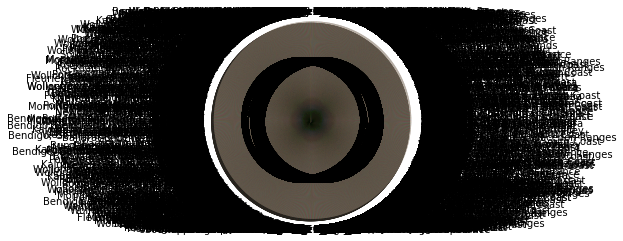

In [69]:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df2['Location'] #['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = df2['Id']
#explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



In [70]:
df2["AverageSalary"] = df2.loc[:, ["LowestSalary","HighestSalary"]].mean(axis = 1)
AverageSalary = df2.groupby('AverageSalary')
averageSalaryStats = AverageSalary.count()
averageSalaryStats['Count'] = averageSalaryStats['Id']
averageSalaryStats['Count']

AverageSalary
15.0     1954
35.0      720
45.0     1112
55.0      831
65.0      910
75.0      898
90.0      775
110.0     870
135.0     743
175.0     769
599.5     370
Name: Count, dtype: int64

In [269]:
location_counts = df2.groupby('Location').count()

In [270]:
type(location_counts)

pandas.core.frame.DataFrame

In [271]:
type(labels)

pandas.core.series.Series

In [272]:
location_counts['Id']

Location
ACT                                    182
Adelaide                               204
Adelaide Hills & Barossa                 7
Albany & Great Southern                  5
Albury Area                             10
                                      ... 
Western QLD                             28
Whyalla & Eyre Peninsula                 6
Wollongong, Illawarra & South Coast     42
Yarra Valley & High Country              7
Yorke Peninsula & Clare Valley           3
Name: Id, Length: 66, dtype: int64

In [273]:
location_counts.index

Index(['ACT', 'Adelaide', 'Adelaide Hills & Barossa',
       'Albany & Great Southern', 'Albury Area',
       'Alice Springs & Central Australia', 'Bairnsdale & Gippsland',
       'Ballarat & Central Highlands', 'Bendigo, Goldfields & Macedon Ranges',
       'Blue Mountains & Central West', 'Brisbane', 'Broome & Kimberley',
       'Bunbury & South West', 'Bundaberg & Wide Bay Burnett',
       'Cairns & Far North', 'Central & South East TAS',
       'Coffs Harbour & North Coast', 'Coober Pedy & Outback SA', 'Darwin',
       'Devonport & North West', 'Dubbo & Central NSW',
       'Far West & North Central NSW', 'Fleurieu Peninsula & Kangaroo Island',
       'Geraldton, Gascoyne & Midwest', 'Gladstone & Central QLD',
       'Gold Coast', 'Gosford & Central Coast', 'Hervey Bay & Fraser Coast',
       'Hobart', 'Horsham & Grampians', 'Kalgoorlie, Goldfields & Esperance',
       'Katherine & Northern Australia', 'Launceston & North East',
       'Lismore & Far North Coast', 'Mackay & Coalfie

In [274]:
location_counts.index[0]

'ACT'

In [275]:
location_counts['Id'][0]

182

In [276]:
type(location_counts)

pandas.core.frame.DataFrame

In [278]:
qld = ['Northern QLD', 'Rockhampton & Capricorn Coast', 'Gold Coast', 'Mackay & Coalfields', 'Bundaberg & Wide Bay Burnett', 'Cairns & Far North', 'Sunshine Coast', 'Gladstone & Central QLD', 'Toowoomba & Darling Downs', 'Western QLD', 'Hervey Bay & Fraser Coast', 'Somerset & Lockyer']
nsw = ['Newcastle, Maitland & Hunter', 'Blue Mountains & Central West', 'Gosford & Central Coast', 'Port Macquarie & Mid North Coast', 'Southern Highlands & Tablelands', 'Dubbo & Central NSW', 'Wollongong, Illawarra & South Coast', 'Wagga Wagga & Riverina', 'Lismore & Far North Coast', 'Richmond & Hawkesbury', 'Coffs Harbour & North Coast', 'Albury Area', 'Tamworth & North West NSW', 'Far West & North Central NSW', 'Tumut, Snowy & Monaro']
vic = ['Horsham & Grampians', 'Bairnsdale & Gippsland', 'South West Coast VIC', 'Yarra Valley & High Country', 'Mildura & Murray', 'West Gippsland & Latrobe Valley', 'Ballarat & Central Highlands', 'Shepparton & Goulburn Valley', 'Mornington Peninsula & Bass Coast', 'Bendigo, Goldfields & Macedon Ranges']
sa = ['Coober Pedy & Outback SA', 'Whyalla & Eyre Peninsula', 'Adelaide Hills & Barossa', 'Mt Gambier & Limestone Coast', 'Riverland & Murray Mallee', 'Fleurieu Peninsula & Kangaroo Island', 'Yorke Peninsula & Clare Valley']
nt = ['Katherine & Northern Australia', 'Alice Springs & Central Australia']
wa = ['Port Hedland, Karratha & Pilbara', 'Bunbury & South West', 'Geraldton, Gascoyne & Midwest', 'Kalgoorlie, Goldfields & Esperance', 'Northam & Wheatbelt', 'Broome & Kimberley', 'Albany & Great Southern', 'Mandurah & Peel']
tas = ['Launceston & North East', 'Devonport & North West', 'Central & South East TAS']

def locationCount(location):
    location_data =[["QLD",0],["NSW",0],["VIC",0],["SA",0],["NT",0],["WA",0],["TAS",0],["ACT",0],["Hobart",0],["Perth",0],["Darwin",0],["Adelaide",0],["Melbourne",0],["Sydney",0],["Brisbane",0],["Other",0]]
    for index, row in location.iterrows():
        #-------------------------
        if row['Location'] in qld:
            location_data[0][1] = location_data[0][1] + 1
        elif row['Location'] in nsw:
            location_data[1][1] = location_data[1][1] + 1
        elif row['Location'] in vic:
            location_data[2][1] = location_data[2][1] + 1
        elif row['Location'] in sa:
            location_data[3][1] = location_data[3][1] + 1
        elif row['Location'] in nt:
            location_data[4][1] = location_data[4][1] + 1
        elif row['Location'] in wa:
            location_data[5][1] = location_data[5][1] + 1
        elif row['Location'] in tas:
            location_data[6][1] = location_data[6][1] + 1
        elif row['Location'] in ["ACT"]:
            location_data[7][1] = location_data[7][1] + 1
        elif row['Location'] in ["Hobart"]:
            location_data[8][1] = location_data[8][1] + 1
        elif row['Location'] in ["Perth"]:
            location_data[9][1] = location_data[9][1] + 1
        elif row['Location'] in ["Darwin"]:
            location_data[10][1] = location_data[10][1] + 1
        elif row['Location'] in ["Adelaide"]:
            location_data[11][1] = location_data[11][1] + 1
        elif row['Location'] in ["Melbourne"]:
            location_data[12][1] = location_data[12][1] + 1
        elif row['Location'] in ["Sydney"]:
            location_data[13][1] = location_data[13][1] + 1
        elif row['Location'] in ["Brisbane"]:
            location_data[14][1] = location_data[14][1] + 1
        else:
            location_data[15][1] = location_data[15][1] + 1
        #-------------------------
    df = pd.DataFrame(location_data, columns = ['Location', 'Count'])
    return df
    
    

In [279]:
type(location_counts)

pandas.core.frame.DataFrame

In [282]:
 for index, row in location_counts.iterrows():
#     print(row['c1'], row['c2'])

for index, row in location_counts.iterrows():
     print(row['Location'])

IndentationError: expected an indented block (3313003256.py, line 4)

In [283]:
location_counts = location_counts.reset_index()

In [284]:
location_counts

,index,Location,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,0,ACT,182,182,182,182,182,182,182,182,182,182,182,182,182
1,1,Adelaide,204,204,204,204,204,204,204,204,204,204,204,204,204
2,2,Adelaide Hills & Barossa,7,7,7,7,7,7,7,7,7,7,7,7,7
3,3,Albany & Great Southern,5,5,5,5,5,5,5,5,5,5,5,5,5
4,4,Albury Area,10,10,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,Western QLD,28,28,28,28,28,28,28,28,28,28,28,28,28
62,62,Whyalla & Eyre Peninsula,6,6,6,6,6,6,6,6,6,6,6,6,6
63,63,"Wollongong, Illawarra & South Coast",42,42,42,42,42,42,42,42,42,42,42,42,42
64,64,Yarra Valley & High Country,7,7,7,7,7,7,7,7,7,7,7,7,7


In [285]:
# location_data[0][1]
# location_data[0][1] = location_data[0][1] + 1
# location_data[0][1]

In [286]:
# location_counts
labels = df["Location"].apply(findLocation)

In [287]:
type(labels)

pandas.core.series.Series

In [288]:
locationsList = locationsList.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [289]:
locationsList
# location_counts = df2.groupby('Location').count()

,Location
0,Melbourne
1,Other
2,Other
3,Melbourne
4,Melbourne
...,...
9947,Other
9948,Perth
9949,Sydney
9950,Other


In [290]:
all_Locations = df2['Location']
all_Locations

0         Melbourne
1             Other
2             Other
3         Melbourne
4         Melbourne
           ...     
9947          Other
9948          Perth
9949         Sydney
9950          Other
9951    Western QLD
Name: Location, Length: 9952, dtype: object

In [291]:
#all_Locations = all_Locations.to_frame()
#all_Locations['Location'][950:]
locationStats = locationCount(all_Locations)

AttributeError: 'Series' object has no attribute 'iterrows'

In [292]:
locationStats

,Location,Count
0,QLD,438
1,NSW,403
2,VIC,194
3,SA,38
4,NT,16
5,WA,112
6,TAS,19
7,ACT,182
8,Hobart,33
9,Perth,431


In [293]:
locationStats['Count'].sum()

9952

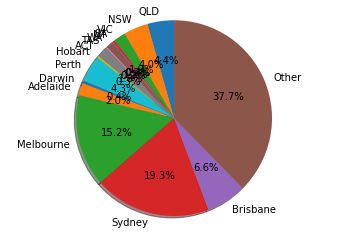

In [294]:
locations = locationStats.iloc[:,0]
vals = locationStats.iloc[:,1]

%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = locationStats.iloc[:,0] #['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = locationStats.iloc[:,1]
#explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [296]:
# Use time series
df2.sort_values(['Date'])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
8853,37360036,Senior Tax Manager,HSBC Bank Australia,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Banking & Financial Services,Other,Some careers grow faster than others.If you’re...,"['Some', 'career', 'grow', 'faster', 'othersIf...",150,200,Full Time,175.0
9832,37357346,Project Manager - Highways - ADB,Bayside Personnel,2018-10-01,ACT,Other,Engineering,Other,Project Engineer-Manager Position Available Wi...,"['International', 'opportunity', 'available', ...",200,999,Full Time,599.5
6470,37359375,In-House Legal Counsel | Part Time Opportunity,Elias Recruitment Pty Limited,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Legal,Corporate & Commercial Law,*Exclusively listed with Elias Recruitment* Co...,"['InHouse', 'Legal', 'Counsel', 'Part', 'Time'...",150,200,Full Time,175.0
9709,37361594,Commissioning Team - Metallurgists - Expressio...,Downing Teal,2018-10-01,Blue Mountains & Central West,Other,"Mining, Resources & Energy",Mining - Engineering & Maintenance,"Metallurgists, Process Operators, E&I Techs ne...","['Metallurgists', 'Process', 'Operators', 'Eam...",150,200,Casual/Vacation,175.0
3020,37355726,Seasonal Full Time Sales Associates l UNIQLO C...,Uniqlo Australia,2018-10-01,Melbourne,Eastern Suburbs,Retail & Consumer Products,Retail Assistants,UNIQLO are looking for passionate staff to joi...,"['At', 'UNIQLO', 'believe', 'work', 'truly', '...",30,40,Contract/Temp,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,38557197,Scanning Officer/Digitisation Officer,Hays Office Support,2019-03-13,Other,Other,Other,Other,NSW government organisation located in Kingswo...,['Other'],50,60,Other,55.0
722,38560483,Marketing Whizz,Fusion5,2019-03-13,Other,Other,Other,Other,"Updating website, setting up automated email m...",['Other'],80,100,Other,90.0
7464,38562232,EA/Events Co-ordinator,Hays Office Support,2019-03-13,Other,Other,Other,Other,Experienced EA/Events Coordinator required for...,['Other'],70,80,Other,75.0
9835,38557250,Head of Risk,Pacific Search Partners,2019-03-13,Other,Other,Other,Other,An outstanding opportunity to lead the Risk fu...,['Other'],150,200,Other,175.0


In [300]:
df2.groupby('JobType').describe()

# Title
# Company
# Date
# Location
# Area  
# Classification
# SubClassification
# LowestSalary
# HighestSalary
# JobType

Id                                                        \
                  count          mean            std         min          25%   
JobType                                                                         
Casual/Vacation   795.0  3.777913e+07  288148.034619  36845593.0  37512490.50   
Contract/Temp    1698.0  3.778731e+07  297305.717810  37214794.0  37504074.25   
Full Time        6291.0  3.779358e+07  294012.885476  36880470.0  37508903.50   
Other             531.0  3.790131e+07  261212.776790  37367499.0  37835047.50   
Part Time         637.0  3.779874e+07  293793.758526  37354057.0  37513430.00   

                                                    LowestSalary             \
                        50%         75%         max        count       mean   
JobType                                                                       
Casual/Vacation  37694525.0  38007953.5  38442044.0        795.0  40.540881   
Contract/Temp    37829334.0  38013609.0  38517731.0       1698.0  82.885748   
Full Time        37858987.0  38012614.5  38519476.0       6291.0  67.820696   
Other            37914031.0  38000403.0  38562232.0        531.0  47.815443   
Part Time        37699111.0  38017389.0  38477985.0        637.0  43.296703   

                 ... HighestSalary        AverageSalary              \
                 ...           75%    max         count        mean   
JobType          ...                                                  
Casual/Vacation  ...          60.0  999.0         795.0   50.311950   
Contract/Temp    ...         150.0  999.0        1698.0  131.136926   
Full Time        ...         120.0  999.0        6291.0   89.491019   
Other            ...         100.0  999.0         531.0   71.444444   
Part Time        ...          70.0  999.0         637.0   55.426217   

                                                             
                        std   min   25%   50%    75%    max  
JobType                                                      
Casual/Vacation   48.655392  15.0  35.0  45.0   55.0  599.5  
Contract/Temp    159.004462  15.0  45.0  75.0  135.0  599.5  
Full Time         99.521891  15.0  45.0  65.0  110.0  599.5  
Other            104.978355  15.0  15.0  35.0   90.0  599.5  
Part Time         64.798867  15.0  35.0  45.0   65.0  599.5  

[5 rows x 32 columns]

In [302]:
#Average salary by SubClassification

df2.groupby('SubClassification').describe()

Id                                         \
                        count        mean            std         min   
Company                                                                
11 Recruitment            2.0  37577074.0  103735.393227  37503722.0   
1300 CHEFHIRE             1.0  37638522.0            NaN  37638522.0   
1300apprentice            1.0  37960436.0            NaN  37960436.0   
1918 Bistro and Grill     1.0  38086956.0            NaN  38086956.0   
1st Choice People         1.0  37986285.0            NaN  37986285.0   
...                       ...         ...            ...         ...   
white mojo                1.0  37502930.0            NaN  37502930.0   
whitecollarblue pty ltd   1.0  38335589.0            NaN  38335589.0   
wpccc                     1.0  38005107.0            NaN  38005107.0   
xtend recruitment         1.0  37908980.0            NaN  37908980.0   
yourtown                  1.0  37682417.0            NaN  37682417.0   

                                                                         \
                                25%         50%         75%         max   
Company                                                                   
11 Recruitment           37540398.0  37577074.0  37613750.0  37650426.0   
1300 CHEFHIRE            37638522.0  37638522.0  37638522.0  37638522.0   
1300apprentice           37960436.0  37960436.0  37960436.0  37960436.0   
1918 Bistro and Grill    38086956.0  38086956.0  38086956.0  38086956.0   
1st Choice People        37986285.0  37986285.0  37986285.0  37986285.0   
...                             ...         ...         ...         ...   
white mojo               37502930.0  37502930.0  37502930.0  37502930.0   
whitecollarblue pty ltd  38335589.0  38335589.0  38335589.0  38335589.0   
wpccc                    38005107.0  38005107.0  38005107.0  38005107.0   
xtend recruitment        37908980.0  37908980.0  37908980.0  37908980.0   
yourtown                 37682417.0  37682417.0  37682417.0  37682417.0   

                        LowestSalary         ... HighestSalary         \
                               count   mean  ...           75%    max   
Company                                      ...                        
11 Recruitment                   2.0   75.0  ...         105.0  120.0   
1300 CHEFHIRE                    1.0   60.0  ...          70.0   70.0   
1300apprentice                   1.0   30.0  ...          40.0   40.0   
1918 Bistro and Grill            1.0    0.0  ...          30.0   30.0   
1st Choice People                1.0    0.0  ...          30.0   30.0   
...                              ...    ...  ...           ...    ...   
white mojo                       1.0   60.0  ...          70.0   70.0   
whitecollarblue pty ltd          1.0  120.0  ...         150.0  150.0   
wpccc                            1.0   30.0  ...          40.0   40.0   
xtend recruitment                1.0  200.0  ...         999.0  999.0   
yourtown                         1.0   60.0  ...          70.0   70.0   

                        AverageSalary                                          \
                                count   mean        std    min     25%    50%   
Company                                                                         
11 Recruitment                    2.0   82.5  38.890873   55.0   68.75   82.5   
1300 CHEFHIRE                     1.0   65.0        NaN   65.0   65.00   65.0   
1300apprentice                    1.0   35.0        NaN   35.0   35.00   35.0   
1918 Bistro and Grill             1.0   15.0        NaN   15.0   15.00   15.0   
1st Choice People                 1.0   15.0        NaN   15.0   15.00   15.0   
...                               ...    ...        ...    ...     ...    ...   
white mojo                        1.0   65.0        NaN   65.0   65.00   65.0   
whitecollarblue pty ltd           1.0  135.0        NaN  135.0  135.00  135.0   
wpccc                             1.0   35.0        N

In [314]:
#Average salary by Date
decr_SubClassification = df2.filter(['SubClassification','LowestSalary', 'HighestSalary','AverageSalary'])
decr_SubClassification['SubClassification'].replace('Other', np.nan, inplace=True)#replace('', np.nan, inplace=True)
decr_SubClassification.dropna(subset=['SubClassification'], inplace=True)
decr_SubClassification.groupby('SubClassification').describe()
#Average salary by Location
#Average salary by Title
#Average salary by Classification
#Average salary by JobType


LowestSalary                               \
                                          count        mean        std   min   
SubClassification                                                              
Account & Relationship Management          60.0   68.333333  52.920364   0.0   
Accounts Officers/Clerks                   36.0   40.833333  33.413000   0.0   
Accounts Payable                           11.0   47.272727  25.334131   0.0   
Accounts Receivable/Credit Control         25.0   44.800000  21.432063   0.0   
Actuarial                                   7.0   87.142857  44.986771   0.0   
...                                         ...         ...        ...   ...   
Web Development & Production               18.0   92.222222  60.542212   0.0   
Welders & Boilermakers                     28.0   42.500000  32.389413   0.0   
Winery & Viticulture                        1.0   40.000000        NaN  40.0   
Workers' Compensation                      10.0   63.000000  38.020462   0.0   
Workplace Training & Assessment             5.0  100.000000  36.742346  60.0   

                                                              HighestSalary  \
                                     25%    50%    75%    max         count   
SubClassification                                                             
Account & Relationship Management   37.5   65.0  105.0  200.0          60.0   
Accounts Officers/Clerks             0.0   45.0   60.0  120.0          36.0   
Accounts Payable                    40.0   60.0   60.0   70.0          11.0   
Accounts Receivable/Credit Control  50.0   50.0   60.0   70.0          25.0   
Actuarial                           80.0  100.0  100.0  150.0           7.0   
...                                  ...    ...    ...    ...           ...   
Web Development & Production        62.5   90.0  120.0  200.0          18.0   
Welders & Boilermakers               0.0   50.0   60.0  120.0          28.0   
Winery & Viticulture                40.0   40.0   40.0   40.0           1.0   
Workers' Compensation               60.0   70.0   77.5  120.0          10.0   
Workplace Training & Assessment     70.0  100.0  120.0  150.0           5.0   

                                                ...                \
                                          mean  ...    75%    max   
SubClassification                               ...                 
Account & Relationship Management   117.133333  ...  127.5  999.0   
Accounts Officers/Clerks             58.333333  ...   70.0  150.0   
Accounts Payable                     60.909091  ...   70.0   80.0   
Accounts Receivable/Credit Control   58.000000  ...   70.0   80.0   
Actuarial                           112.857143  ...  120.0  200.0   
...                                        ...  ...    ...    ...   
Web Development & Production        202.666667  ...  150.0  999.0   
Welders & Boilermakers               59.642857  ...   70.0  150.0   
Winery & Viticulture                 50.000000  ...   50.0   50.0   
Workers' Compensation                81.000000  ...   95.0  150.0   
Workplace Training & Assessment     124.000000  ...  150.0  200.0   

                                   AverageSalary                          \
                                           count        mean         std   
SubClassification                                                          
Account & Relationship Management           60.0   92.733333  106.826902   
Accounts Officers/Clerks                    36.0   49.583333   31.176342   
Accounts Payable                            11.0   54.090909   21.658507   
Accounts Receivable/Credit Control          25.0   51.400000   18.000000   
Actuarial                                    7.0  100.000000   47.169906   
...                                          ...         ...         ...   
Web Development & Production                18.0  147.444444  171.585675   
Welders & Boilermakers                      28.0   51.071429   30.072663   
Wine